In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.columns

Index(['ID', '#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)',
       'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',
       'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)'],
      dtype='object')

In [4]:
max(df['WVHT(m)'])

2.63

In [5]:
# fig, ax = plt.subplots(figsize=(16, 16))
# # sns.heatmap(df.corr(),annot=True)

In [6]:
df=df.drop(['ID'],axis=1)

In [7]:
# df=df.drop(['#YY','DD','PRES(hPa)', 'DPD(sec)','ATMP(degC)', 'WTMP(degC)','MWD(degT)','WDIR(degT)'],axis=1)

In [8]:
df.columns

Index(['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)',
       'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)',
       'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)'],
      dtype='object')

In [9]:
# fig, ax = plt.subplots(figsize=(18, 18))
# sns.heatmap(df.corr(),annot=True)

In [10]:
# df['h+m']=df['hh']*60+df['mm']

In [11]:
# df=df.drop(['hh','mm'],axis=1)

In [12]:
# fig, ax = plt.subplots(figsize=(18, 18))
# sns.heatmap(df.corr(),annot=True)

In [13]:
# #removing outliers
# Q1 = df['WVHT(m)'].quantile(0.25)
# Q3 = df['WVHT(m)'].quantile(0.75)
# IQR = Q3 - Q1    #IQR is interquartile range. 

# filter = (df[ 'WVHT(m)'] >= Q1 - 1.5 * IQR) & (df['WVHT(m)'] <= Q3 + 1.5 *IQR)
# df=df.loc[filter]  


In [14]:
# fig, ax = plt.subplots(figsize=(20, 8))
# sns.boxplot(data=df[df.columns], orient="h")
# plt.show

In [15]:
df=df.reset_index(drop=True)

In [16]:
# df= pd.get_dummies(df,columns=['#YY', 'MM'])
df=df.reset_index(drop=True)
df=df.astype('float')

In [17]:
df

#YY   MM    DD    hh    mm  WDIR(degT)  WSPD(m/s)  GST(m/s)  \
0     2017.0  4.0  24.0   1.0  50.0        23.0        3.0       3.6   
1     2017.0  4.0  24.0   2.0  50.0        30.0        2.9       3.3   
2     2017.0  4.0  24.0   3.0  50.0       360.0        2.2       2.5   
3     2017.0  4.0  24.0   4.0  50.0       355.0        2.5       3.1   
4     2017.0  4.0  24.0   5.0  50.0       355.0        3.5       4.5   
...      ...  ...   ...   ...   ...         ...        ...       ...   
3881  2019.0  6.0  28.0   1.0  40.0       100.0        8.2       9.6   
3882  2019.0  6.0  28.0   2.0  40.0        84.0        3.1       4.2   
3883  2019.0  6.0  28.0   3.0  40.0       169.0        2.0       3.8   
3884  2019.0  6.0  28.0   4.0  40.0       203.0        4.2       4.9   
3885  2019.0  6.0  28.0  18.0  40.0       173.0        5.9       7.2   

      DPD(sec)  APD(sec)  MWD(degT)  PRES(hPa)  ATMP(degC)  WTMP(degC)  \
0         4.17      3.33      349.0     1019.1         4.7         5.1   
1         5.26      4.21      358.0     1018.8         4.6         4.8   
2         5.88      4.79       11.0     1018.3         4.6         4.7   
3         5.88      4.95       23.0     1018.1         4.6         4.6   
4         6.25      4.98       26.0     1018.3         4.5         4.6   
...        ...       ...        ...        ...         ...         ...   
3881      3.33      2.89      318.0     1020.6        15.5        12.4   
3882      3.57      2.75      304.0     1019.4        16.5        12.2   
3883      3.45      2.88      320.0     1020.6        15.2        12.3   
3884      3.70      2.96      310.0     1020.8        14.5        12.3   
3885      2.35      2.37      354.0     1018.4        15.3        12.2   

      DEWP(degC)  WVHT(m)  
0            4.2     0.39  
1            4.1     0.65  
2            4.2     0.90  
3            4.2     0.91  
4            4.0     0.88  
...          ...      ...  
3881        14.1     0.34  
3882        14.2     0.33  
3883        13.4     0.35  
3884        13.3     0.25  
3885        14.3     0.25  

[3886 rows x 16 columns]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(df[['MM',
 'DD',
 'hh',
 'WDIR(degT)',
 'WSPD(m/s)',
 'APD(sec)',
 'MWD(degT)',
 'PRES(hPa)',
 'WTMP(degC)']]) 

In [19]:
# fig, ax = plt.subplots(figsize=(20, 8))
# sns.boxplot(data=x, orient="h")
# plt.show

In [20]:
q=df['WVHT(m)']
y=np.array(q)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from functools import partial

# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf    
from sklearn.preprocessing import StandardScaler
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1,10)):
        # Tune the number of units for each layer
        units = hp.Int('units_' + str(i), 32, 512, 32)
        # Tune the activation function for each layer
        activation = hp.Choice('activation_' + str(i), ['relu'])
        # Add the layers to the model
        model.add(layers.Dense(units=units, activation=activation,activity_regularizer=keras.regularizers.l2(hp.Choice('l2_reg', values=[1e-3, 1e-4, 1e-5]))))
    # Add the output layer with one unit
    model.add(layers.Dense(units=1,activation='linear'))
    # Tune the optimizer and learning rate
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    # Compile the model with the tuned hyperparameters
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=[hp.Choice('metric', ['mse'])])
    return model

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=4,
    directory='Trial 1(only train)',
    project_name='t9')

# Define the data
# (X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

# Train the tuner
tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_test, y_test))

# Get the best model and print the summary
best_model = tuner.get_best_models()[0]
best_model.summary()


Trial 5 Complete [00h 00m 43s]
val_loss: 0.007354802917689085

Best val_loss So Far: 0.007354802917689085
Total elapsed time: 00h 03m 23s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 192)               6336      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 121,921
Trainable params: 121,921
Non-trainable params: 0
______

In [23]:
# best_model.summary()

In [24]:
history = best_model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
98/98 [==============================] - 0s 4ms/step - loss: 0.0053 - mse: 0.0051 - val_loss: 0.0075 - val_mse: 0.0074
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0051 - mse: 0.0049 - val_loss: 0.0077 - val_mse: 0.0075
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0048 - val_loss: 0.0096 - val_mse: 0.0094
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0052 - mse: 0.0050 - val_loss: 0.0171 - val_mse: 0.0170
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0048 - mse: 0.0047 - val_loss: 0.0079 - val_mse: 0.0077
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0047 - mse: 0.0046 - val_loss: 0.0081 - val_mse: 0.0079
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0047 - mse: 0.0045 - val_loss: 0.0123 - val_mse: 0.0122
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0047 - mse: 0.00

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss       mse  val_loss   val_mse  epoch
45  0.002969  0.002829  0.008788  0.008638     45
46  0.002795  0.002656  0.014685  0.014572     46
47  0.002960  0.002823  0.008261  0.008133     47
48  0.002856  0.002718  0.007519  0.007379     48
49  0.002881  0.002743  0.008565  0.008437     49

In [26]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

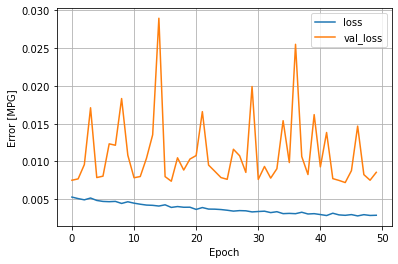

In [27]:
plot_loss(history)

In [28]:
test_results = {}

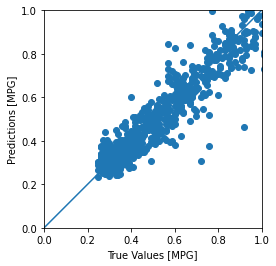

In [29]:
test_predictions = best_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [30]:
# Error metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Train rmse
NN_train_preds =best_model.predict(X_train)
NN_train_rmse = np.sqrt(mean_squared_error(y_train, NN_train_preds))
NN_train_r2 = r2_score(y_train, NN_train_preds)

# Test r2
NN_val_preds = best_model.predict(X_test)
NN_val_rmse = np.sqrt(mean_squared_error(y_test, NN_val_preds))
NN_val_r2 = r2_score(y_test, NN_val_preds)

print('Train RMSE: {}, Test RMSE: {}'.format(NN_train_rmse, NN_val_rmse))
print('Train R2: {}, Test R2: {}'.format(NN_train_r2, NN_val_r2))

Train RMSE: 0.05132522003983967, Test RMSE: 0.0918536741913078
Train R2: 0.9810621436884776, Test R2: 0.9392551974130775


In [31]:
### Decision Trees
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor() 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

y_fit_train=regressor.predict(X_train)
r2_score(y_train, y_fit_train)  #Training accuracy
print(np.sqrt(mean_squared_error(y_train, y_fit_train)))

5.173942657653585e-18


In [32]:
y_fit_test=regressor.predict(X_test)
r2_score(y_test, y_fit_test)  #Testing accuracy
print(np.sqrt(mean_squared_error(y_test, y_fit_test)))

0.1314248590384056


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=50)
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=50)

In [34]:
y_fit_train=regr.predict(X_train)
print(r2_score(y_train, y_fit_train))
print(np.sqrt(mean_squared_error(y_train, y_fit_train)))

0.9920252882464978
0.03330603304499559


In [36]:
y_fit_test=regr.predict(X_test)
print(r2_score(y_test, y_fit_test))  #Testing accuracy
print(np.sqrt(mean_squared_error(y_test, y_fit_test)))

0.9420765869774141
0.08969516692192324


In [1247]:
# import itertools
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Load your data into a pandas dataframe


# # Extract the feature column names from the dataframe
# features = list(df.columns.values)
# features.remove('WVHT(m)')  # Remove the target column if it exists
# # data=pd.DataFrame()
# # Generate all possible combinations of feature names
# combos = []
# for i in range(1, len(features) + 1):
#     combos += list(itertools.combinations(features, i))

# comb=[]
# err=[]

# # Iterate over each combination of features and train a model
# for combo in combos:
#     X = df[list(combo)].values
#     y = df['WVHT(m)'].values
    
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     # Train a decision tree regressor on the training set
#     model = RandomForestRegressor(max_depth=50)
#     model.fit(X_train, y_train)
    
#     # Evaluate the performance of the model on the testing set
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
    
#     comb.append(combo)
#     err.append(np.sqrt(mse))
#     # Print the feature combination and its corresponding mean squared error
#     print("Features:", combo)
#     print("Mean squared error:", np.sqrt(mse))
#     print()


Features: ('#YY',)
Mean squared error: 0.3805830231032486

Features: ('MM',)
Mean squared error: 0.37520131623420727

Features: ('DD',)
Mean squared error: 0.3676578068734022

Features: ('hh',)
Mean squared error: 0.3875523832071037

Features: ('mm',)
Mean squared error: 0.3804377355318514

Features: ('WDIR(degT)',)
Mean squared error: 0.3906282454125915

Features: ('WSPD(m/s)',)
Mean squared error: 0.2500787336124691

Features: ('GST(m/s)',)
Mean squared error: 0.26239759645119715

Features: ('DPD(sec)',)
Mean squared error: 0.23803346827825556

Features: ('APD(sec)',)
Mean squared error: 0.18854687078990223

Features: ('MWD(degT)',)
Mean squared error: 0.37919271580368524

Features: ('PRES(hPa)',)
Mean squared error: 0.38808368833829476

Features: ('ATMP(degC)',)
Mean squared error: 0.38351176154558103

Features: ('WTMP(degC)',)
Mean squared error: 0.346478296696802

Features: ('DEWP(degC)',)
Mean squared error: 0.3905479005329711

Features: ('#YY', 'MM')
Mean squared error: 0.371603

Features: ('PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.28432750798536094

Features: ('PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.34326183408143107

Features: ('ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.2992420412661728

Features: ('ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.38400659670937853

Features: ('WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.30889973472683013

Features: ('#YY', 'MM', 'DD')
Mean squared error: 0.23386445225582114

Features: ('#YY', 'MM', 'hh')
Mean squared error: 0.40569826122578306

Features: ('#YY', 'MM', 'mm')
Mean squared error: 0.37148895280838734

Features: ('#YY', 'MM', 'WDIR(degT)')
Mean squared error: 0.3754382304250324

Features: ('#YY', 'MM', 'WSPD(m/s)')
Mean squared error: 0.2650274137905406

Features: ('#YY', 'MM', 'GST(m/s)')
Mean squared error: 0.27115524354667353

Features: ('#YY', 'MM', 'DPD(sec)')
Mean squared error: 0.23397553130491244

Features: ('#YY', 'MM', 'APD(sec)')
Mean squared error: 0.18646842476536615

Feat

Features: ('MM', 'DD', 'MWD(degT)')
Mean squared error: 0.24193606218125524

Features: ('MM', 'DD', 'PRES(hPa)')
Mean squared error: 0.20708608583960214

Features: ('MM', 'DD', 'ATMP(degC)')
Mean squared error: 0.22511773259811346

Features: ('MM', 'DD', 'WTMP(degC)')
Mean squared error: 0.19650456975324734

Features: ('MM', 'DD', 'DEWP(degC)')
Mean squared error: 0.22527639712411857

Features: ('MM', 'hh', 'mm')
Mean squared error: 0.4007336636534458

Features: ('MM', 'hh', 'WDIR(degT)')
Mean squared error: 0.3720460410061335

Features: ('MM', 'hh', 'WSPD(m/s)')
Mean squared error: 0.2697703089011445

Features: ('MM', 'hh', 'GST(m/s)')
Mean squared error: 0.2685054084571257

Features: ('MM', 'hh', 'DPD(sec)')
Mean squared error: 0.27364679229401984

Features: ('MM', 'hh', 'APD(sec)')
Mean squared error: 0.18036434270319507

Features: ('MM', 'hh', 'MWD(degT)')
Mean squared error: 0.36367354497277116

Features: ('MM', 'hh', 'PRES(hPa)')
Mean squared error: 0.3731544418226404

Features: 

Features: ('DD', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.13655583445339042

Features: ('DD', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.09697244766001761

Features: ('DD', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.21138868049289625

Features: ('DD', 'WSPD(m/s)', 'PRES(hPa)')
Mean squared error: 0.2041132202165985

Features: ('DD', 'WSPD(m/s)', 'ATMP(degC)')
Mean squared error: 0.20029224194980202

Features: ('DD', 'WSPD(m/s)', 'WTMP(degC)')
Mean squared error: 0.18483423189139178

Features: ('DD', 'WSPD(m/s)', 'DEWP(degC)')
Mean squared error: 0.2017092042672544

Features: ('DD', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.1365444155351484

Features: ('DD', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.10018980397945432

Features: ('DD', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.21631409697384887

Features: ('DD', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.213637847024748

Features: ('DD', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.20662640120861084

Fe

Features: ('mm', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.2778149645452311

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.1514828790774515

Features: ('mm', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.1065325946479275

Features: ('mm', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.2475146908459481

Features: ('mm', 'WSPD(m/s)', 'PRES(hPa)')
Mean squared error: 0.2555915829587058

Features: ('mm', 'WSPD(m/s)', 'ATMP(degC)')
Mean squared error: 0.24401296990461935

Features: ('mm', 'WSPD(m/s)', 'WTMP(degC)')
Mean squared error: 0.23095000283587622

Features: ('mm', 'WSPD(m/s)', 'DEWP(degC)')
Mean squared error: 0.24489504805224357

Features: ('mm', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.15055562871860503

Features: ('mm', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.10708271893379089

Features: ('mm', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.2517183390044671

Features: ('mm', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.2631117846805399

Featu

Features: ('WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.20796030867328547

Features: ('WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18935803327780432

Features: ('WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.2118413292421105

Features: ('WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1929578451008222

Features: ('WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2170030942884928

Features: ('WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19845537433312677

Features: ('GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.1037478325786352

Features: ('GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.14301281248814857

Features: ('GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.13829989177356186

Features: ('GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.14161829545188748

Features: ('GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.13775188418764583

Fea

Features: ('#YY', 'MM', 'mm', 'WTMP(degC)')
Mean squared error: 0.3249707245119758

Features: ('#YY', 'MM', 'mm', 'DEWP(degC)')
Mean squared error: 0.38059673735898225

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)')
Mean squared error: 0.22644056702381177

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)')
Mean squared error: 0.23711706439520072

Features: ('#YY', 'MM', 'WDIR(degT)', 'DPD(sec)')
Mean squared error: 0.21110333049720564

Features: ('#YY', 'MM', 'WDIR(degT)', 'APD(sec)')
Mean squared error: 0.16086787282178672

Features: ('#YY', 'MM', 'WDIR(degT)', 'MWD(degT)')
Mean squared error: 0.31705669554376537

Features: ('#YY', 'MM', 'WDIR(degT)', 'PRES(hPa)')
Mean squared error: 0.2780582940304788

Features: ('#YY', 'MM', 'WDIR(degT)', 'ATMP(degC)')
Mean squared error: 0.2893069385596477

Features: ('#YY', 'MM', 'WDIR(degT)', 'WTMP(degC)')
Mean squared error: 0.2558642434357657

Features: ('#YY', 'MM', 'WDIR(degT)', 'DEWP(degC)')
Mean squared error: 0.30164036378239273

Featur

Features: ('#YY', 'DD', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.15065273203068297

Features: ('#YY', 'DD', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.18807972625207497

Features: ('#YY', 'DD', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.17076845801999188

Features: ('#YY', 'DD', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.18574129097932818

Features: ('#YY', 'DD', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.17078662950465004

Features: ('#YY', 'DD', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.18584179402653123

Features: ('#YY', 'DD', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.1398048211144923

Features: ('#YY', 'DD', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.13360317581506095

Features: ('#YY', 'DD', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.14486418056287842

Features: ('#YY', 'DD', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.13487597550106872

Features: ('#YY', 'DD', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.13742757624635174

Featur

Features: ('#YY', 'mm', 'WSPD(m/s)', 'WTMP(degC)')
Mean squared error: 0.2244630846774091

Features: ('#YY', 'mm', 'WSPD(m/s)', 'DEWP(degC)')
Mean squared error: 0.2405477152483342

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.15095969641896398

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.10380622566220107

Features: ('#YY', 'mm', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.24404822865588216

Features: ('#YY', 'mm', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.24993154748281451

Features: ('#YY', 'mm', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.24175607149109626

Features: ('#YY', 'mm', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.23002131025986128

Features: ('#YY', 'mm', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.24228987082333675

Features: ('#YY', 'mm', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.19295667345326303

Features: ('#YY', 'mm', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.23477038991525578

Features

Features: ('#YY', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.19700833065424472

Features: ('#YY', 'WSPD(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.2153982567273427

Features: ('#YY', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19732360866300253

Features: ('#YY', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18620858077997565

Features: ('#YY', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.2036529570189706

Features: ('#YY', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18906118597515212

Features: ('#YY', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2102648623644235

Features: ('#YY', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1977179493697148

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.100834182123411

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.13776616278658035

Features: ('#YY', 'G

Features: ('MM', 'DD', 'WDIR(degT)', 'APD(sec)')
Mean squared error: 0.13983386182577717

Features: ('MM', 'DD', 'WDIR(degT)', 'MWD(degT)')
Mean squared error: 0.22202634359423165

Features: ('MM', 'DD', 'WDIR(degT)', 'PRES(hPa)')
Mean squared error: 0.1955312929564653

Features: ('MM', 'DD', 'WDIR(degT)', 'ATMP(degC)')
Mean squared error: 0.20301483965672956

Features: ('MM', 'DD', 'WDIR(degT)', 'WTMP(degC)')
Mean squared error: 0.19170275680067145

Features: ('MM', 'DD', 'WDIR(degT)', 'DEWP(degC)')
Mean squared error: 0.2098438817271262

Features: ('MM', 'DD', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.22226636816425657

Features: ('MM', 'DD', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.13486885122802006

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.09427937373301531

Features: ('MM', 'DD', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.2025650378714607

Features: ('MM', 'DD', 'WSPD(m/s)', 'PRES(hPa)')
Mean squared error: 0.18650645831019677

Features

Features: ('MM', 'hh', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.2624557909218027

Features: ('MM', 'hh', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.2388833956697386

Features: ('MM', 'hh', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2957191596400855

Features: ('MM', 'hh', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.24444610416458237

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)')
Mean squared error: 0.22999481002640532

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)')
Mean squared error: 0.240971623276077

Features: ('MM', 'mm', 'WDIR(degT)', 'DPD(sec)')
Mean squared error: 0.21381417660230914

Features: ('MM', 'mm', 'WDIR(degT)', 'APD(sec)')
Mean squared error: 0.16280666353820603

Features: ('MM', 'mm', 'WDIR(degT)', 'MWD(degT)')
Mean squared error: 0.3199912228720267

Features: ('MM', 'mm', 'WDIR(degT)', 'PRES(hPa)')
Mean squared error: 0.28368129109866397

Features: ('MM', 'mm', 'WDIR(degT)', 'ATMP(degC)')
Mean squared error: 0.2960004612652821

Featu

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.22910156398638143

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.22234117184226196

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.22648523858324748

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.22831100958993666

Features: ('MM', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09959195807685398

Features: ('MM', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.13806268740090427

Features: ('MM', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.13526501461999893

Features: ('MM', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.13957545444460237

Features: ('MM', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.13525389357364284

Features: ('MM', 'WSPD(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.13844266380729384

Features: ('MM', 'WSPD(m/s)', 'APD(

Features: ('DD', 'hh', 'mm', 'MWD(degT)')
Mean squared error: 0.2589143585570426

Features: ('DD', 'hh', 'mm', 'PRES(hPa)')
Mean squared error: 0.2348421480844762

Features: ('DD', 'hh', 'mm', 'ATMP(degC)')
Mean squared error: 0.224243786120155

Features: ('DD', 'hh', 'mm', 'WTMP(degC)')
Mean squared error: 0.13796696464242028

Features: ('DD', 'hh', 'mm', 'DEWP(degC)')
Mean squared error: 0.2519736841171454

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)')
Mean squared error: 0.2075394791321824

Features: ('DD', 'hh', 'WDIR(degT)', 'GST(m/s)')
Mean squared error: 0.20897737466863087

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)')
Mean squared error: 0.18772283778476181

Features: ('DD', 'hh', 'WDIR(degT)', 'APD(sec)')
Mean squared error: 0.14794271150309998

Features: ('DD', 'hh', 'WDIR(degT)', 'MWD(degT)')
Mean squared error: 0.2604793716575767

Features: ('DD', 'hh', 'WDIR(degT)', 'PRES(hPa)')
Mean squared error: 0.23062853330139058

Features: ('DD', 'hh', 'WDIR(degT)', 'ATMP(deg

Features: ('DD', 'mm', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17429143638985695

Features: ('DD', 'mm', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2129808072428974

Features: ('DD', 'mm', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17543653768773382

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.22062461177567064

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.13256247233661697

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.09393866490160561

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.20753115726062232

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)')
Mean squared error: 0.19489835139859968

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)')
Mean squared error: 0.1914960471311041

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)')
Mean squared error: 0.18553661816410089

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)

Features: ('DD', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17821505208071806

Features: ('DD', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1911067622681124

Features: ('DD', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1750204550683108

Features: ('DD', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.14264464515752612

Features: ('DD', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.1397523621656425

Features: ('DD', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.14428941420172992

Features: ('DD', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.13787706366794739

Features: ('DD', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.14327844973389292

Features: ('DD', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.17458260817904794

Features: ('DD', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.17978848654149804

Features: ('DD', 'DPD(sec)', 'MWD(degT

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)')
Mean squared error: 0.2099091990927344

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)')
Mean squared error: 0.1967867471881544

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DEWP(degC)')
Mean squared error: 0.21103750443377345

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.13288190229591057

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09773651972480778

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.22722234204614594

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.21899062973697392

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.21457166293503058

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.20622171785524215

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.20943061549137218

Features: ('hh', 'WDIR(de

Features: ('hh', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19666162835760873

Features: ('hh', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.20348268904978276

Features: ('hh', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.18433879233600609

Features: ('hh', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.1926071786562559

Features: ('hh', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19718488583835428

Features: ('hh', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.17622805469677863

Features: ('hh', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19309722406975383

Features: ('hh', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19544214793043146

Features: ('hh', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.22102168024212043

Features: ('hh', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18752012831120526

Features: ('hh', 'APD(sec)', 

Features: ('mm', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.21026158725068894

Features: ('mm', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.20080091311953324

Features: ('mm', 'WSPD(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.21647211043539058

Features: ('mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.20676094991974714

Features: ('mm', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1856488797641433

Features: ('mm', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.20744183754100645

Features: ('mm', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18998669542814908

Features: ('mm', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.21377760959575035

Features: ('mm', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1956034621870899

Features: ('mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.1022528564039489

Features: ('mm', 'GST(m/

Features: ('WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.20848663627778816

Features: ('WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.19876997980445965

Features: ('WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.21377815029835753

Features: ('WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19740042294644267

Features: ('WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18550031406094578

Features: ('WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1991272247070633

Features: ('WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18636215499642095

Features: ('WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2029340564312459

Features: ('WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1896900997575135

Features: ('WDIR(degT)', 'GST(m/s)', 'DPD(sec)

Features: ('WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.22220005943716967

Features: ('WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.21285582173933848

Features: ('WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1966450333910918

Features: ('WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.20963075304474763

Features: ('WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19722410327492945

Features: ('WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2175458128626874

Features: ('WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20211060646329806

Features: ('WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09689203545563259

Features: ('WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09257481591889047

Features: ('WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean 

Features: ('DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.14681937853116883

Features: ('DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.14592637136988817

Features: ('DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.13535540814451205

Features: ('DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.15196944917742675

Features: ('DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.14780933146719913

Features: ('DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15571006983599053

Features: ('DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14430437119263348

Features: ('DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18854086339028892

Features: ('DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.17530559227142134

Features: ('DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean 

Features: ('#YY', 'MM', 'DD', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.12481679868072604

Features: ('#YY', 'MM', 'DD', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.1362214324355398

Features: ('#YY', 'MM', 'DD', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.1333275773780951

Features: ('#YY', 'MM', 'DD', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.13240173073911488

Features: ('#YY', 'MM', 'DD', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.17027086824211438

Features: ('#YY', 'MM', 'DD', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1785521389707171

Features: ('#YY', 'MM', 'DD', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.17862629333866814

Features: ('#YY', 'MM', 'DD', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.2053077283559564

Features: ('#YY', 'MM', 'DD', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1463957086127282

Features: ('#YY', 'MM', 'DD', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.14620794960225061

Features: ('#YY', 'MM', 'DD', '

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.14570070210161168

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.10013259527884752

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.2365502409728783

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.23291358273601329

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.22117428227792205

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.22582205249944914

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.2302027974527703

Features: ('#YY', 'MM', 'mm', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.1793971498370086

Features: ('#YY', 'MM', 'mm', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.212796751267514

Features: ('#YY', 'MM', 'mm', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.20390007968394747

Features: ('#YY', 'MM', 'mm', 'DPD(sec)', 'AT

Features: ('#YY', 'MM', 'WSPD(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09618045365774573

Features: ('#YY', 'MM', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19973708809652646

Features: ('#YY', 'MM', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1998386686574656

Features: ('#YY', 'MM', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.191764220588742

Features: ('#YY', 'MM', 'WSPD(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.20438561824678989

Features: ('#YY', 'MM', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18965049488869218

Features: ('#YY', 'MM', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18275468367896378

Features: ('#YY', 'MM', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19487263228814355

Features: ('#YY', 'MM', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1861660910008734

Features: ('#YY', 'MM', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(deg

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'MWD(degT)')
Mean squared error: 0.22250962796534232

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'PRES(hPa)')
Mean squared error: 0.2063544052175752

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'ATMP(degC)')
Mean squared error: 0.1934758377533083

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WTMP(degC)')
Mean squared error: 0.16475158873199738

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DEWP(degC)')
Mean squared error: 0.20574491613193951

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.22213892620181752

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.1275264070103186

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.09397564596673459

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.19802305022149094

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'PRES(hPa)')
Mean squared error: 0.18692458286341912

Features: ('#YY', 'DD', 'hh'

Features: ('#YY', 'DD', 'mm', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17422875618419298

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.21245627122860788

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.12938285183028067

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.09269401989291143

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.19755234580135847

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)')
Mean squared error: 0.1891567739430304

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)')
Mean squared error: 0.18436739600458527

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)')
Mean squared error: 0.18119174208597538

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DEWP(degC)')
Mean squared error: 0.1867155795874259

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)')
M

Features: ('#YY', 'DD', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.19161057363313896

Features: ('#YY', 'DD', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18156941177829522

Features: ('#YY', 'DD', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.17387704232375803

Features: ('#YY', 'DD', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18103579385622912

Features: ('#YY', 'DD', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17812004202495105

Features: ('#YY', 'DD', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18572636574784157

Features: ('#YY', 'DD', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17196899638627297

Features: ('#YY', 'DD', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.1388004013282497

Features: ('#YY', 'DD', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.13253485857115216

Features: ('#YY', 'DD', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean

Features: ('#YY', 'hh', 'mm', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.23985892740950993

Features: ('#YY', 'hh', 'mm', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.29674442660620065

Features: ('#YY', 'hh', 'mm', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.258388769799912

Features: ('#YY', 'hh', 'mm', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.3181663805131954

Features: ('#YY', 'hh', 'mm', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2583130888186784

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.22367302705829106

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.13053722981436847

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.09506245815860652

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.21766447520453774

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)')
Mean squared error: 0.20712661

Features: ('#YY', 'hh', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.2129977812863432

Features: ('#YY', 'hh', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.21511150677507632

Features: ('#YY', 'hh', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.20531160392040723

Features: ('#YY', 'hh', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.2114062551516006

Features: ('#YY', 'hh', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.20446122840359854

Features: ('#YY', 'hh', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1937525109216185

Features: ('#YY', 'hh', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.20248336022909594

Features: ('#YY', 'hh', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19399801821729135

Features: ('#YY', 'hh', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2095321207223272

Features: ('#YY', 'hh', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mea

Features: ('#YY', 'mm', 'WDIR(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2826757634594626

Features: ('#YY', 'mm', 'WDIR(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.23048914290213204

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.1462740007904883

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.10166903851461138

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.2316057120664794

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.23291885819920985

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.23027302802961708

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.22628146516563458

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.23164881775057208

Features: ('#YY', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)')
Mean s

Features: ('#YY', 'mm', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.28229550157383637

Features: ('#YY', 'mm', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.23988333747428836

Features: ('#YY', 'mm', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.20241102042371548

Features: ('#YY', 'mm', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.255276138310039

Features: ('#YY', 'mm', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2133501669460556

Features: ('#YY', 'mm', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.239032020390738

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.1371667438915864

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09795795646058143

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.22365519208948875

Features: ('#YY', 'WDIR(degT)', 'WSPD(

Features: ('#YY', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1333894427302124

Features: ('#YY', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12575335215574246

Features: ('#YY', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1382424665221528

Features: ('#YY', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13904332691979668

Features: ('#YY', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14941729139085938

Features: ('#YY', 'WDIR(degT)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13767340904696096

Features: ('#YY', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.24307335376071826

Features: ('#YY', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.2000196726507189

Features: ('#YY', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.24633718

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.0969208203853255

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09516911727973856

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09648284528581912

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.13051288903048938

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.132939785062419

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12916994057271158

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.13017277159671556

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1307488829994291

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1298879936869191

Features: ('#YY', '

Features: ('MM', 'DD', 'hh', 'mm', 'WTMP(degC)')
Mean squared error: 0.12791928111398918

Features: ('MM', 'DD', 'hh', 'mm', 'DEWP(degC)')
Mean squared error: 0.15209757733299462

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)')
Mean squared error: 0.19730249960305724

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)')
Mean squared error: 0.19882988478805924

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)')
Mean squared error: 0.15863095816040906

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'APD(sec)')
Mean squared error: 0.13495238730028555

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'MWD(degT)')
Mean squared error: 0.20128315853549622

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'PRES(hPa)')
Mean squared error: 0.18031178100060252

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'ATMP(degC)')
Mean squared error: 0.18843564229027124

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WTMP(degC)')
Mean squared error: 0.16940483288147057

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'D

Features: ('MM', 'DD', 'mm', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.15916922030105782

Features: ('MM', 'DD', 'mm', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1402586175053778

Features: ('MM', 'DD', 'mm', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17205327520682495

Features: ('MM', 'DD', 'mm', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16584726113458798

Features: ('MM', 'DD', 'mm', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1765802211414947

Features: ('MM', 'DD', 'mm', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17670507660164966

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.21185087666270297

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.13218917540060252

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.09368800126471302

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.1988609159553519

Featu

Features: ('MM', 'DD', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09485284017740743

Features: ('MM', 'DD', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.195648023731985

Features: ('MM', 'DD', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.19230128855108114

Features: ('MM', 'DD', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1884037339105257

Features: ('MM', 'DD', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.19003564382886143

Features: ('MM', 'DD', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18125898926652734

Features: ('MM', 'DD', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1755754786215944

Features: ('MM', 'DD', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17824227549576294

Features: ('MM', 'DD', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17682290469441478

Features: ('MM', 'DD', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared er

Features: ('MM', 'hh', 'mm', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.2260631736218998

Features: ('MM', 'hh', 'mm', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.2915968189923821

Features: ('MM', 'hh', 'mm', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.2559635309519266

Features: ('MM', 'hh', 'mm', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.22067617325295158

Features: ('MM', 'hh', 'mm', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.25881797850855986

Features: ('MM', 'hh', 'mm', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.22503512214134527

Features: ('MM', 'hh', 'mm', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2896094433020839

Features: ('MM', 'hh', 'mm', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2396271692227966

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.22202021813837317

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.13347100255055738

Features: ('MM', 'hh

Features: ('MM', 'hh', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09454794624325523

Features: ('MM', 'hh', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09590365311725062

Features: ('MM', 'hh', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.21039934883387165

Features: ('MM', 'hh', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.21333733549159406

Features: ('MM', 'hh', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.207348066716833

Features: ('MM', 'hh', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.20882559505882164

Features: ('MM', 'hh', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.20473315255037072

Features: ('MM', 'hh', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1989905603230625

Features: ('MM', 'hh', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1978672188894714

Features: ('MM', 'hh', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared erro

Features: ('MM', 'mm', 'WDIR(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.2154135803266

Features: ('MM', 'mm', 'WDIR(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2627696519312652

Features: ('MM', 'mm', 'WDIR(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.22634036260432608

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.14393512482353293

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.0991001647047327

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.22888964834072212

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.22352132165842484

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.21754304711082686

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.22204754468334528

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DEWP(degC)')
Mean squared e

Features: ('MM', 'mm', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.21399960463220496

Features: ('MM', 'mm', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2576959189520225

Features: ('MM', 'mm', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.23430030375133615

Features: ('MM', 'mm', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19881658379111516

Features: ('MM', 'mm', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.23383220963786852

Features: ('MM', 'mm', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20453251940092199

Features: ('MM', 'mm', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.22188602867177767

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.13855736244016528

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09796630991916244

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GS

Features: ('MM', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.13434570578637445

Features: ('MM', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1272761792707836

Features: ('MM', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1326731004907564

Features: ('MM', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13561048479420112

Features: ('MM', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14470099016686072

Features: ('MM', 'WDIR(degT)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13603547255347953

Features: ('MM', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.21622637318364807

Features: ('MM', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19943708306838964

Features: ('MM', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.2304947998621577

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09575387855589755

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09797577083621828

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1279833003948116

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.13225461480132478

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12773736642615974

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.13057451053730418

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.13109127109225782

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12798909849192763

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1289774860288168

Features: ('MM', 'GST(m/

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.22920298753598967

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.12891125748967602

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.09418884446810305

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.20291461017663623

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)')
Mean squared error: 0.19558451654090578

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'ATMP(degC)')
Mean squared error: 0.18981722490041464

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'WTMP(degC)')
Mean squared error: 0.17655088978480007

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DEWP(degC)')
Mean squared error: 0.19204497521785552

Features: ('DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.12886426453409072

Features: ('DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09578399862356997

Features: ('DD', 'hh', 'mm', 'GST(m/s)', 'MW

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.1295954289039627

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12507546195205224

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.1271276900942078

Features: ('DD', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.0909935212671562

Features: ('DD', 'hh', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08878329116000987

Features: ('DD', 'hh', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09184378572807066

Features: ('DD', 'hh', 'WSPD(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.0904918013869319

Features: ('DD', 'hh', 'WSPD(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09152988210833699

Features: ('DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.193328748209672

Features: ('DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)')
Mean squared error: 0.18174779315194164

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DEWP(degC)')
Mean squared error: 0.18974629963775597

Features: ('DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.13081432611811977

Features: ('DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09492525763607423

Features: ('DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.20943794249665

Features: ('DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.20267677478823373

Features: ('DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.19189410095840242

Features: ('DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.19207304454088986

Features: ('DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.1945425609158882

Features: ('DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)')
Mean square

Features: ('DD', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.13485879721949656

Features: ('DD', 'mm', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.14244818207433108

Features: ('DD', 'mm', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.13745171635738668

Features: ('DD', 'mm', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.14110373337150292

Features: ('DD', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1730617476606949

Features: ('DD', 'mm', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.17815270527448868

Features: ('DD', 'mm', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.16906642936949567

Features: ('DD', 'mm', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.17618111000290457

Features: ('DD', 'mm', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.16795061565587266

Features: ('DD', 'mm', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.186028229987239

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1876950098493965

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18860905258556296

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18116342944135358

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18980417452155726

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1804730292320868

Features: ('DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.12489549652174768

Features: ('DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.13394149314576964

Features: ('DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.1384656075457285

Features

Features: ('DD', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1289828219437362

Features: ('DD', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12445865940481046

Features: ('DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08770285900784022

Features: ('DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08970911267631757

Features: ('DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08957654996337996

Features: ('DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08977034831734806

Features: ('DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08738555740323183

Features: ('DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08713523455099592

Features: ('DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08903708341837344

Features: 

Features: ('DD', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15469421403341593

Features: ('DD', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16806194384697254

Features: ('DD', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.130779388062119

Features: ('DD', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1247053207800226

Features: ('DD', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.13139847630713028

Features: ('DD', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1295682064230312

Features: ('DD', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1325740860443263

Features: ('DD', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12824594693355545

Features: ('DD', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11853899551448692

Features

Features: ('hh', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20948445485332032

Features: ('hh', 'mm', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1965562723836805

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09871792147612082

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.13351533244324154

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.13106505508044114

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.13450088124824788

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.13169805561765305

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.13248623598297196

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09507316260010833

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.20740995568492765

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19428133203389292

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18345784001153145

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1956341633611982

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18288891605826357

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19752231246193044

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18722502469345623

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.0965858820390149

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.129034599094569



Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.21689152543293905

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.21118092935414215

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.21707280521404826

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.20968649119265872

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.2008853036079432

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.20761958074440687

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1951521388577927

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.21570434192058657

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20066810635338891

Features:

Features: ('hh', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1857799484034587

Features: ('hh', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19764237600214635

Features: ('hh', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18282428054785452

Features: ('hh', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18952582069341256

Features: ('hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.14085479911755688

Features: ('hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.147178267778999

Features: ('hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.13860744706917238

Features: ('hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.14497491011544725

Features: ('hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1404427563632601

Features: ('hh'

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09505020902924864

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09451129582521033

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0960402664321045

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.21207426874263868

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.21449390991528292

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.20522480054720507

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.21249276434074701

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.20194650205318415

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19629418380031116

Featur

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1349560757235218

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12873165550962395

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.13158179916487425

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1308116190964367

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1289827843386132

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12847767528357792

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13309349798917466

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1327059468720382

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13041405234997783

Features: (

Features: ('mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1743713269969098

Features: ('mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1820454873358702

Features: ('mm', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1883961864401267

Features: ('mm', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19139256331046908

Features: ('mm', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1773987539489959

Features: ('mm', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17368145325481418

Features: ('mm', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18822354578834927

Features: ('mm', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16929679003820386

Features: ('mm', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18914859243460078

Featur

Features: ('WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19600260589265006

Features: ('WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19145098844577363

Features: ('WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20404901135754056

Features: ('WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1915183324670282

Features: ('WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1763170001004486

Features: ('WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19167018161897512

Features: ('WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17961571715284005

Features: ('WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18304379345210467

Features: ('WDIR(degT)', 'GST(m/s)', 'DPD(

Features: ('WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13528439719122573

Features: ('WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12732479660433074

Features: ('WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1354565989741937

Features: ('WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19239765793512223

Features: ('WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2362711488065243

Features: ('WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1946777203337466

Features: ('WDIR(degT)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.219301264682894

Features: ('WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1956988966147913

Features: ('WSPD(m/s)', 'GST(m/s)', 'DPD(sec)'

Features: ('WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08990913393553827

Features: ('WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09199292151711728

Features: ('WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18475683328851714

Features: ('WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19251617309284333

Features: ('WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1821074908569691

Features: ('WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18708966630756108

Features: ('WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1739693138440887

Features: ('GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.09134875365512371

Features: ('GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(de

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'DEWP(degC)')
Mean squared error: 0.14465063220897995

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)')
Mean squared error: 0.19105829643059585

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)')
Mean squared error: 0.19519431749151117

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)')
Mean squared error: 0.1590144361362921

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'APD(sec)')
Mean squared error: 0.13375693990115942

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'MWD(degT)')
Mean squared error: 0.18867374753184948

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'PRES(hPa)')
Mean squared error: 0.17639796288805035

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'ATMP(degC)')
Mean squared error: 0.16507181493944872

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WTMP(degC)')
Mean squared error: 0.16552507976390868

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'DEWP(degC)')
Mean squa

Features: ('#YY', 'MM', 'DD', 'mm', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.13022054287961607

Features: ('#YY', 'MM', 'DD', 'mm', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1700095281616908

Features: ('#YY', 'MM', 'DD', 'mm', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.17912503222872986

Features: ('#YY', 'MM', 'DD', 'mm', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1753543814791273

Features: ('#YY', 'MM', 'DD', 'mm', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.20199503122160012

Features: ('#YY', 'MM', 'DD', 'mm', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.14635398259426982

Features: ('#YY', 'MM', 'DD', 'mm', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.14869819866684034

Features: ('#YY', 'MM', 'DD', 'mm', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1643074889096105

Features: ('#YY', 'MM', 'DD', 'mm', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16530489153240374

Features: ('#YY', 'MM', 'DD', 'mm', 'ATMP(degC)', 'DEWP(degC)')
Mean

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09429200876741907

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12793335201518255

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12641142974106506

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.1304310207169836

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12906914677759962

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.12686850139437567

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09175450338672879

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09011027035039963

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09355051691967452

Features: ('#YY', 'MM', 'D

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.2247491028661649

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.213184928061587

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.21800232797679003

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.21674402948104765

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.16542683160012747

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.19459432904318094

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.19319791005417267

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.20917147890511104

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.19710462109998494

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'DEWP(degC)')
Mean squared error:

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09357849680491431

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09184489027101402

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09412579041683439

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19547848223780245

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.19899821759029176

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1958251818938341

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.19993037480242348

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1889240797721079

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1871681188933551

Features

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)')
Mean squared error: 0.19532185361331478

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DEWP(degC)')
Mean squared error: 0.20427211091825598

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.13659694693731775

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09672248338299522

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.22004944014084243

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.21089776687290795

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.21135866206840967

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.20556615836833517

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.20768238322200375

Featu

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19667604578930784

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19382082736222658

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20389116626680456

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19408775934962666

Features: ('#YY', 'MM', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.1516198313164064

Features: ('#YY', 'MM', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.14625715099884296

Features: ('#YY', 'MM', 'mm', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.1605750416274719

Features: ('#YY', 'MM', 'mm', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.15224172520799878

Features: ('#YY', 'MM', 'mm', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.1568049384330809

Features: ('#YY',

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09245118568854871

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09177804825440655

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09448549071840716

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09398803634965334

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09444043524766627

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.20339478321878604

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.2072916426265848

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.19930474846629884

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'D

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19493988590005876

Features: ('#YY', 'MM', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09144176792493021

Features: ('#YY', 'MM', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09102985703309274

Features: ('#YY', 'MM', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09383594761213508

Features: ('#YY', 'MM', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09334460988923118

Features: ('#YY', 'MM', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09311812618477955

Features: ('#YY', 'MM', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1281538594287446

Features: ('#YY', 'MM', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.13261067334959317

Features: ('#YY', 'MM', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC

Features: ('#YY', 'MM', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.13705586105250367

Features: ('#YY', 'MM', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1427133767102119

Features: ('#YY', 'MM', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1390029484036067

Features: ('#YY', 'MM', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.13976108594297226

Features: ('#YY', 'MM', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.13713294409924437

Features: ('#YY', 'MM', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.13075369310877002

Features: ('#YY', 'MM', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.13989670652357747

Features: ('#YY', 'MM', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.14155450447068452

Features: ('#YY', 'MM', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)'

Features: ('#YY', 'DD', 'hh', 'mm', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12759186815801157

Features: ('#YY', 'DD', 'hh', 'mm', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1817849339488752

Features: ('#YY', 'DD', 'hh', 'mm', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.15016846529531983

Features: ('#YY', 'DD', 'hh', 'mm', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17775329612127191

Features: ('#YY', 'DD', 'hh', 'mm', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14803877518700598

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)')
Mean squared error: 0.2022474365187509

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)')
Mean squared error: 0.12602295145353135

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)')
Mean squared error: 0.09233513536921027

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)')
Mean squared error: 0.19584347696021515

Features: ('#YY', 'DD', 'hh', 'WDIR(de

Features: ('#YY', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09160092029544094

Features: ('#YY', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08893955400918195

Features: ('#YY', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09223852866164885

Features: ('#YY', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09148613398806546

Features: ('#YY', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09352786808202758

Features: ('#YY', 'DD', 'hh', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19313687542210814

Features: ('#YY', 'DD', 'hh', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.19061866790865453

Features: ('#YY', 'DD', 'hh', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.18597659888865115

Features: ('#YY', 'DD', 'hh', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.18999177245073462

Features: ('#YY', 

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.1369378665666348

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19663620769026033

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.2011887756110579

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.17915322528418856

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.2190681062547001

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19201034089568986

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.16872245776578546

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1908854740316849

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1676400885092824

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.13246347161030467

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.13586214934513094

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.13090498673732498

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.1339939873665442

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1253684042084724

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12012588925033481

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12580346940581055

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13236137319214578

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13616145210987077

Features: (

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.13702146464616016

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.13370564356470196

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.134873347330195

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.16227507237129962

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1610281591319326

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.15770376992590623

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.15870362711557695

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.16450893832039526

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'PRES(hPa)', 

Features: ('#YY', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08851402275148491

Features: ('#YY', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.0884734199696785

Features: ('#YY', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08923626232725586

Features: ('#YY', 'DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08876421288127258

Features: ('#YY', 'DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08778015700606992

Features: ('#YY', 'DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0890842614757148

Features: ('#YY', 'DD', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0903183235884916

Features: ('#YY', 'DD', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09053492906311203

Features: ('#YY', 'DD', 'WSPD(m/s)', 'APD(sec)', 'WTMP(degC)', 'D

Features: ('#YY', 'DD', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16101742038486092

Features: ('#YY', 'DD', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15510759277856354

Features: ('#YY', 'DD', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16761055409393893

Features: ('#YY', 'DD', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1286995130752629

Features: ('#YY', 'DD', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12458089158276979

Features: ('#YY', 'DD', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12800706549827914

Features: ('#YY', 'DD', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.131028634010247

Features: ('#YY', 'DD', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13175799054319035

Features: ('#YY', 'DD', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)'

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.19857313274671168

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.2100939091959449

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1976224147323052

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18798492894111865

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.20135276717964357

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18379319400335184

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20748574553819937

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19611982411605167

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09702509712959691

Feat

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12911289772868226

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12567445724205387

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.12682529808336016

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09082793041484946

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09067821082122098

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09282853267260613

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09252473003678781

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0932138079762291

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(deg

Features: ('#YY', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18791850770971374

Features: ('#YY', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.21435794452378645

Features: ('#YY', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19180282844629792

Features: ('#YY', 'hh', 'WDIR(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20924902695777667

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.096609768542793

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.13158299315414435

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12937093403568195

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.13393645656014228

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12632389745969977

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12858579268212925

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13119910407478289

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.128542168818347

Features: ('#YY', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.09006491846038095

Features: ('#YY', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09223714539011507

Features: ('#YY', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09079791893134012

Features: ('#YY', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09196836223917602

Features: ('#YY', 'hh', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.13003659366340295

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.13108473715957694

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09298161834262944

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09122081538433562

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09304745548225578

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09373142676155675

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0935055000238188

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.20392631743707024

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(deg

Features: ('#YY', 'mm', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.21838375517519976

Features: ('#YY', 'mm', 'WDIR(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19105721376897014

Features: ('#YY', 'mm', 'WDIR(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.21797869851379922

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09846738489820812

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.13567285240183055

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.13351549305697366

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.13836827556928954

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.13450149276232765

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'D

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13312359907353524

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13438867531895904

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13226553980413833

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.09067116091455892

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09344031080751301

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09276268814051257

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09294978355117778

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09176759597456587

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(deg

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.20776480581964563

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.20001876875301086

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.20650803189344438

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19652062903156362

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19003950847518786

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19597103584320863

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1919583864635148

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20251368711876494


Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09287712873001142

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0937998559807271

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0934285424535091

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19525638296858386

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19170979872719227

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19652075928597004

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1970074128549338

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2056607562421613

Fe

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09228314161438744

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09179637337348585

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.09113318173058228

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09182993614413826

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0937781382622747

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0951770401500402

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09400099784790071

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1983716626821228

Features: ('#YY

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1263692988995752

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1295218122889416

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12850840369427757

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12756565193146324

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13118824780622645

Features: ('#YY', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08851426605711547

Features: ('#YY', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08895622504520447

Features: ('#YY', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08877962093039704

Features: ('

Features: ('MM', 'DD', 'hh', 'mm', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.12064087611467862

Features: ('MM', 'DD', 'hh', 'mm', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.136807871349711

Features: ('MM', 'DD', 'hh', 'mm', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.1312210986174291

Features: ('MM', 'DD', 'hh', 'mm', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.1310851206998514

Features: ('MM', 'DD', 'hh', 'mm', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.15162441653291206

Features: ('MM', 'DD', 'hh', 'mm', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.15433957324320488

Features: ('MM', 'DD', 'hh', 'mm', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.15042418061306015

Features: ('MM', 'DD', 'hh', 'mm', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.18805079805152355

Features: ('MM', 'DD', 'hh', 'mm', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.13933540381318762

Features: ('MM', 'DD', 'hh', 'mm', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17589010671468372

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17038720775208652

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09312848996238221

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12524638848191788

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12430747510753025

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12739833579764798

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12426368027908981

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.12603813272078784

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09161612217938317

Features: ('MM', 'DD', 'hh'

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.15944197947730332

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.15843180890914288

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.16344292374949268

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.12397094967155763

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.12485635978357763

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.13557606692509994

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.13123220868404972

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.13171147114277798

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1826799802033466

Features: ('M

Features: ('MM', 'DD', 'mm', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.15865894643925604

Features: ('MM', 'DD', 'mm', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.15313089233367014

Features: ('MM', 'DD', 'mm', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1602112381885536

Features: ('MM', 'DD', 'mm', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.166519230224343

Features: ('MM', 'DD', 'mm', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1698254287922417

Features: ('MM', 'DD', 'mm', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16834879367580616

Features: ('MM', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.13022314726972664

Features: ('MM', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.13556279993027487

Features: ('MM', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.13264766724175237

Features: ('MM', 'DD'

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18191946094336056

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17980509960284125

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.12298767483757765

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.12448058174415184

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.1339100055105498

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.13316228868899688

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.13230215077713994

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.15822152834190523

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'ATMP(deg

Features: ('MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13007566622350075

Features: ('MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1250988260393399

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08708479040449228

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08993791810527163

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08923447010840038

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08870714396679392

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08838431781125791

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0867946921540612

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)'

Features: ('MM', 'DD', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16972165063194058

Features: ('MM', 'DD', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16357887252127873

Features: ('MM', 'DD', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.15293552640390903

Features: ('MM', 'DD', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15745900935035123

Features: ('MM', 'DD', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15632808808558046

Features: ('MM', 'DD', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16235628805704252

Features: ('MM', 'DD', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.13036590713422969

Features: ('MM', 'DD', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12330634010056998

Features: ('MM', 'DD', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEW

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09479177315078252

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19634550239578696

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.2012713464385138

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.19888788379722067

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.2018801690305784

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19044093346446683

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18825780544522974

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19696580598547156

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1816845762065742

Features: ('MM

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12954985740130795

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.1271905211218158

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12987907233991394

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12742566173009337

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.13031260575442805

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09031796766300909

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.0886626321475492

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09344261522095593

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'WTMP(de

Features: ('MM', 'hh', 'WDIR(degT)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.21614257612097343

Features: ('MM', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18786599528677342

Features: ('MM', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2161325986054593

Features: ('MM', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19302319419215908

Features: ('MM', 'hh', 'WDIR(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2088167242314802

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09592030452438846

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.13067550766437414

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.1299212820303956

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1256362523001655

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1267827714285557

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12981221022261036

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13135251379085738

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12820422623563807

Features: ('MM', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.0893620421422624

Features: ('MM', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09195847727325879

Features: ('MM', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09169532231077053

Features: ('MM', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean sq

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12925785845227672

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.13067614081736692

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09200401396742568

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08979779470099453

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09315981714002548

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09231723241642528

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09287872161060667

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1952822437654717

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATM

Features: ('MM', 'mm', 'WDIR(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19464045645219222

Features: ('MM', 'mm', 'WDIR(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2121627685400968

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09665544967127729

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.13477225307750046

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.13347751184999593

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.13651121752290743

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.13376588251625304

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.13563302848235614

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mea

Features: ('MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1330951066585562

Features: ('MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13148251163386382

Features: ('MM', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08959077708855764

Features: ('MM', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09255772276640024

Features: ('MM', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09155511425374024

Features: ('MM', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09229293338441048

Features: ('MM', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0911924653987449

Features: ('MM', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.09109028460042334

Features: ('MM', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean sq

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.20215023924989992

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.20425260845121648

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19625923144007743

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19381192258672048

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1938297778701794

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19184397044845924

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20079304322666716

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19187033046996338

Featur

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09230978427281465

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19824027454692994

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19450869783817987

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19612451670809689

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1942613425670128

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20401909545690566

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19454099438458713

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1835978875311821

Featur

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09201959673090988

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09482426032953647

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0958515901092838

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09414498813943195

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19821848799891453

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19566863153712005

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19966692184401308

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1985292698887766

Features: ('MM', '

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12585213081364255

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12907668990412904

Features: ('MM', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08941631530184738

Features: ('MM', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08821206475085627

Features: ('MM', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09035966892722404

Features: ('MM', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09259175703288615

Features: ('MM', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09174282849889068

Features: ('MM', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09101200258425197

Features: ('MM', '

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.15855206945198297

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19317867779667072

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16342639318579244

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.13046078538300557

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09437342299436598

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.2069608244414156

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.20302010031301188

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.19776783804121473

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.19361719423874604

Features: ('DD', 

Features: ('DD', 'hh', 'mm', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12915251232395245

Features: ('DD', 'hh', 'mm', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.15862702710290708

Features: ('DD', 'hh', 'mm', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.14875110757618373

Features: ('DD', 'hh', 'mm', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18244377374524506

Features: ('DD', 'hh', 'mm', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.15850911771395862

Features: ('DD', 'hh', 'mm', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19171174112141548

Features: ('DD', 'hh', 'mm', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17501297131508484

Features: ('DD', 'hh', 'mm', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1323265180934853

Features: ('DD', 'hh', 'mm', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17091815834164534

Featur

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.15793763705318448

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1668987191533022

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15849106204474742

Features: ('DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12023103691020826

Features: ('DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12251033454124896

Features: ('DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12199668465510877

Features: ('DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12445103470265088

Features: ('DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12627132454995066

Features: ('DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', '

Features: ('DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18295411255495517

Features: ('DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1788068243940132

Features: ('DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18574900744301928

Features: ('DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17915249586254423

Features: ('DD', 'hh', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16593394963862435

Features: ('DD', 'hh', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18096846154661902

Features: ('DD', 'hh', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16756134797198974

Features: ('DD', 'hh', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1676707071264317

Features: ('DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)',

Features: ('DD', 'hh', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12091210456711246

Features: ('DD', 'hh', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12690962094916272

Features: ('DD', 'hh', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.14343721040597815

Features: ('DD', 'hh', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1789652372141176

Features: ('DD', 'hh', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15769207967519458

Features: ('DD', 'hh', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16983039463960725

Features: ('DD', 'hh', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15180920688690072

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.13149762907536455

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12013659802528945

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1235120099173774

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12186148263974476

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12277124274956452

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12830085009947045

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12021515218519682

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12711373841396245

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12996373322480206

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'D

Features: ('DD', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1767185824715259

Features: ('DD', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16166094940535033

Features: ('DD', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1727629450058522

Features: ('DD', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1624214209456534

Features: ('DD', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1630451026031275

Features: ('DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09351741215047249

Features: ('DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09076357115235745

Features: ('DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.0937943343671836

Features: ('DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
M

Features: ('DD', 'mm', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17855816937057717

Features: ('DD', 'mm', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16181092424696034

Features: ('DD', 'mm', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1739323777274339

Features: ('DD', 'mm', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14892669277525822

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09483494848953554

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.128013810811001

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12701725825493768

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12915282696124875

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12351135908337381

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12384216995485003

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1246529826861154

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12298919863957625

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12468775200991213

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12564482625654969

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12869572982051888

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12580491686722406

Features: ('DD

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09332166419279118

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12449972269510005

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.127631462544948

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12452629501073362

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12790824927017985

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12633614600197518

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12496721791213576

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12419742881359282

Features: ('DD', 'WSPD(m/s)'

Features: ('DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.0922518623410848

Features: ('DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09122308505409493

Features: ('DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.0916035011707261

Features: ('DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08924838070006397

Features: ('DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08863970839801044

Features: ('DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.090465680336612

Features: ('DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09237390453518003

Features: ('DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09395640541363814

Features: ('DD', 'GST(m/s)', 'DPD(

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09122263290002854

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09041727439487121

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09251562495699049

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09193034393630208

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09284929450998848

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.20359986190090312

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.19720217191168002

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.19635149562176724

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', '

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09771520228886986

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.13281014151391457

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.13075552596618653

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.1343288852359773

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.1309783200922589

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.13332655621165515

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09346363073368635

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.0934797353732341

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared er

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.0895002886640661

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09273619846870335

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09101648400096092

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09269464284595594

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09197412826400085

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0904884162223929

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09070290544715354

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09343942713018126

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean sq

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1977030895548607

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19430623528847302

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1977296585399467

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1926064527545054

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20028278485045842

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19109566831119112

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09225683552886198

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08942576124237872

Features: ('

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19443140333833192

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19601476611394453

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19605949860256175

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20280695900808726

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19510909050565392

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18390429010150305

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1912820732048955

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18137501454098615

Fea

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0942314009660292

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0933417178875583

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.2039773310783096

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19775895080149467

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.2005285639219164

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.2014273631095202

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20831278887219593

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19818913028334292

Features: ('hh', '

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08822279571519273

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08784458802478509

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08875812819869944

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09204343489600447

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09154249950672261

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09038862403397777

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08990680679156066

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09076954214653175

Features: ('hh', 'G

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12641944573379563

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12568139769873032

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12924770398183416

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13032288614420837

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12744071957244038

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08820432497017783

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09090007883175648

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09057753563350902

Featur

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13636223374444179

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14504894320693917

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13764504978413544

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.17172264823760955

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.16512173350775686

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1659004692788446

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17064268423004228

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16777145574402058

Feature

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08979281035680853

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08917013027733052

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09063280800510079

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09272010136935492

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09336932099371703

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09215144277855704

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12852880415166903

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12579649320764827

Features: ('mm', 'W

Features: ('mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12797848569996662

Features: ('mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.13730292219089651

Features: ('mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13661828815388402

Features: ('mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1395812635204454

Features: ('mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13418647903873301

Features: ('mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1292258311026264

Features: ('mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13929870302066374

Features: ('mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13078253806304116

Features: ('mm', 'DP

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1245356297289231

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1224031457519548

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12362182001181433

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12750580998910152

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1278408899730452

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12314299251960624

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1252416755747511

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(

Features: ('WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12307056850809169

Features: ('WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12466929245295247

Features: ('WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12145531423019656

Features: ('WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1263990770686425

Features: ('WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13224491481177364

Features: ('WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1265631533529107

Features: ('WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13235269534093475

Features: ('WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(d

Features: ('WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12500930430136342

Features: ('WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12508359256327228

Features: ('WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12296126973987026

Features: ('WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1263045756202922

Features: ('WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12694840408910704

Features: ('WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08746027779970778

Features: ('WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08742407186754868

Features: ('WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.16965304637394185

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.1360355086054462

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.12039504933710657

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.134584632970769

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.13055396204306244

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.12925642620254116

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.14483892942016113

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.15070075973456748

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.14509412422396287

Features: ('#YY', 'MM'

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.17918880812949478

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.1800718526968501

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1682123086962282

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.16982965456045476

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1725234861624207

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16467140955063606

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17047385358401465

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1695544771446462

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DEWP(degC)')
Mean squared error: 0.178120308985269

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.12898839463748982

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09428293782566688

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.19799248309173015

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.19357519569452797

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.1879870743598944

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.18769836069904802

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.18858485710429895

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)'

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.18733990968537764

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.17685783345423362

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.17094060210231163

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17655116943842972

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17569814597493297

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17537820247307964

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17536495237310853

Features: ('#YY', 'MM', 'DD', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.13588887541300484

Features: ('#YY', 'MM', 'DD', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)'

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.169975764906433

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09266956319873712

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12560981225896584

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12547837521985575

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12875314037650631

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12573502021506697

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.127681698245434

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09004192910766248

Features: ('#YY', 'MM'

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0930429892763041

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19087010414964856

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.18696940482844326

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.18752318441066615

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.18661988730928872

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.17793031889046543

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.17579738359008878

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1764818960689816

Features: ('#YY', 'M

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08935757010007733

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09162730590637636

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09310988615470933

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09163156484581363

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1842704834738638

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18209435571437527

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1820853655488098

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18033617849745034

Features: ('#YY', 

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.17511920585601137

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.18050333969950116

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.12903315096843596

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.1311434121491756

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.1441192599639097

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.14008758897042795

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.14344142776936566

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.22957050809644666

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'MWD(degT)', 'ATMP

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.17799171823690405

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.18361658918843032

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1722711332229004

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.1799643340843303

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.17403661195498835

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1650602465378824

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17111678279688342

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18713267872635383

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.20099440568894433

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.201225692843022

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1971731670437348

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.1993074433618435

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18936359960000348

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.187986922472191

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19006010411132368

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19054603631072334

Features: ('#Y

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09011342887864913

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09197992446102597

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09229262170165911

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09291026173259072

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12443258201880374

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1277283561671083

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12534890155411263

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12623149257306454

Features: ('#YY', 'MM',

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18148333058494837

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18399808576600113

Features: ('#YY', 'MM', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1330383759409582

Features: ('#YY', 'MM', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.14215713580274505

Features: ('#YY', 'MM', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.13613020088808483

Features: ('#YY', 'MM', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.137817263517287

Features: ('#YY', 'MM', 'hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.13275324235119754

Features: ('#YY', 'MM', 'hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1284563103286058

Features: ('#YY', 'MM', 

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.13118860214065678

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.13244259463645372

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.13192587123565017

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.13200016320002375

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09098972278755607

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.0914191270283872

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09395132347401651

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09448782718351179

Features: ('#YY', 'M

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.20227288777687213

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.2058032986562392

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19359049560127306

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19193751048064017

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19546743688335425

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1925743829876617

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19947012900441646

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19542501727373326

Features: ('#YY

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09427207800572082

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1986739090411121

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1952695989459024

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19480466717908937

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19761413899463584

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20461648661295684

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1950087327488927

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18005317227352136

Features: ('#YY

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18811067296348805

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.0903680620152427

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08940355145548455

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09248692473418411

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.0916409950809923

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0920318310726852

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12475856910670584

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mea

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19211103530073112

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19344690379711157

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20247744921881888

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19393950965744364

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18267249231151575

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18588193833721445

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18239642174617834

Features: ('#YY', 'MM', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)',

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.09039592632493991

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0916404449837098

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09401805014577451

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09485295086563064

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0931582194765504

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19587759277062392

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19165649438003993

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean 

Features: ('#YY', 'MM', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1281593987618644

Features: ('#YY', 'MM', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12628312927845864

Features: ('#YY', 'MM', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.127892204519524

Features: ('#YY', 'MM', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12710085317025485

Features: ('#YY', 'MM', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12678383339886462

Features: ('#YY', 'MM', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1306399667505944

Features: ('#YY', 'MM', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08856380051084896

Features: ('#YY', 'MM', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean s

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.13354536412847007

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.13506639393723455

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19116854146743556

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1845368846237315

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1692797081421425

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.20824659306180957

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18041292938693246

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.15597737279048554

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'PRES(hPa)'

Features: ('#YY', 'DD', 'hh', 'mm', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.15285595828941648

Features: ('#YY', 'DD', 'hh', 'mm', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.16064982820025425

Features: ('#YY', 'DD', 'hh', 'mm', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16397185902678305

Features: ('#YY', 'DD', 'hh', 'mm', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17841594929829077

Features: ('#YY', 'DD', 'hh', 'mm', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1698130960685925

Features: ('#YY', 'DD', 'hh', 'mm', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1297702442216514

Features: ('#YY', 'DD', 'hh', 'mm', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.13427210813544355

Features: ('#YY', 'DD', 'hh', 'mm', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.13129368148130804

Features: ('#YY', 'DD', 'hh', 'mm', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18185691503208545

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1797416787137531

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18093113838708438

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17780928595615167

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1842438359689273

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17611473416125337

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.12128561740667039

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.12576670423685893

Features: (

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12193507222307397

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12420115639299548

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12215223923501578

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12337199860000815

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1242110696874674

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12196349705709443

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12239133383933572

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12600607031323555

Features: ('#YY',

Features: ('#YY', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12944937765521058

Features: ('#YY', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.131719781098542

Features: ('#YY', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12452958976687602

Features: ('#YY', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12073096298864068

Features: ('#YY', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1255199934913432

Features: ('#YY', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13054769066235933

Features: ('#YY', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13360002222418732

Features: ('#YY', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12843608805414838

Features: ('#YY', 'DD', 

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09031506441996554

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08984062388045175

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09228776283812397

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09300139963565195

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0918939089455082

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19575445173162895

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.19051973762359772

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.18609133695383928

Features: ('#YY',

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1812278972960696

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17449787385484927

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18579964943475302

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17715989073416183

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09049958470657349

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08940648012837783

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09119487996102303

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09112837275698918

Features: ('#YY', 'D

Features: ('#YY', 'DD', 'mm', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1836447518211868

Features: ('#YY', 'DD', 'mm', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18909175636837833

Features: ('#YY', 'DD', 'mm', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18407834380528768

Features: ('#YY', 'DD', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16779674584966714

Features: ('#YY', 'DD', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1784967414894878

Features: ('#YY', 'DD', 'mm', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1661415309407672

Features: ('#YY', 'DD', 'mm', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17400619706255852

Features: ('#YY', 'DD', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.13096526575957299

Features: ('#

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.08935065004374104

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0909098431892221

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12351820172271104

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1253740717978697

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12331339309960533

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12437011679321049

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12458261101205488

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)'

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17347241514857836

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18185941040881456

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17594417042175187

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1769778987479629

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.11966352817083853

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12221447796672319

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.11928595489826

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)

Features: ('#YY', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0908674381938187

Features: ('#YY', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18677562997124866

Features: ('#YY', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18394451752360624

Features: ('#YY', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18657508585196572

Features: ('#YY', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1829656705687813

Features: ('#YY', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1877505283265255

Features: ('#YY', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1817115827511075

Features: ('#YY', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
M

Features: ('#YY', 'DD', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12362365654511095

Features: ('#YY', 'DD', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12568174986591066

Features: ('#YY', 'DD', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0865254320162813

Features: ('#YY', 'DD', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08745562267975311

Features: ('#YY', 'DD', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08811274261598634

Features: ('#YY', 'DD', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08972165619993673

Features: ('#YY', 'DD', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0893150868718751

Features: ('#YY', 'DD', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean 

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18528928032565448

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09582808574731558

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.128027787642919

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12743297033350737

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12983600160827766

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12677172742388576

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.12764161931754528

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09194744104741087

Features: ('#YY', 'h

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0957109081737538

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.208789808482033

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.20800802229561152

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.20325436926343962

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.20976166243073815

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.20118909948904626

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19427820251971928

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.20233299984867395

Features: ('#YY', 'hh

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09195409676896621

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09297067370771178

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09442286605987683

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09324745866541265

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19861628440758983

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19550086722928775

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19814380780954216

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19836851242665765

Features: ('#YY'

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1910412399118151

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18875185635546732

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19632736688283306

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18766616366456643

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09042658031096397

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08981222492234167

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.0922956928032165

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)'

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09184078642636878

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1924583052030887

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18998893476776546

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1949609331046043

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.191995820400898

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1989687162631701

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1906891440354073

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(deg

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09054173787928149

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09053157447467573

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08946641562296768

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08975013558789913

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09071271440801408

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09245052883989553

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09426323265647286

Features: ('#YY', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean s

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12306882320155636

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12267731713245723

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12569358598528654

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12745698266201783

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12467149641355421

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12490351005953679

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12584844733511058

Features: ('#YY', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mea

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19293169282854067

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20219113027517732

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19265204381772472

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09218226566334639

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09045956467182989

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09352883688493537

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09248072077278033

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19510820292424672

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1924463416351175

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19522741962324516

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19477124397795428

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2046004086281279

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19488514038644592

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1843931001572567

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.092272645279292

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0912173424322991

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.09063135831785735

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09220140557622407

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09353610337704603

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09548441857303928

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09354320654650755

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squ

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1264051311659854

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12900938299109463

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13038515462873007

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1270299446004477

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12914941975134062

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12865859662634746

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1273540549858416

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09064945774924066

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0904809174728861

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09088935715591755

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09212894904387016

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09337415888541029

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09249478315032537

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.192127305327593

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09321945946050092

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12448348369194309

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12319310786400675

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1251340017987504

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12555409581874963

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1274242571532359

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1241711250788278

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12701595308988403

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1294521129115901

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1265540085078649

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12892012193841954

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12819949543512274

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12560820891378705

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1320113445989691

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 

Features: ('#YY', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08838209005894612

Features: ('#YY', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08958070552332437

Features: ('#YY', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0896659635854483

Features: ('#YY', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18484452773735907

Features: ('#YY', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12735898689302005

Features: ('#YY', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.130542103541023

Features: ('#YY', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1280777289498697

Features: ('#YY', 'DPD(sec)', 'APD(sec)',

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.16964908212789734

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17364766113745672

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16460172345707247

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17387503985869043

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1706433923107825

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09184996141159263

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12372912111265906

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12305792687839842

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean sq

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12672746773960059

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12478033289805367

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.1264427233998509

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.08843738922163713

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.0873037054900187

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09029222687437255

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09087068865456713

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09008313662309969

Features: ('MM', 'DD

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16459211386337871

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18536558739344586

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17497062463699778

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.15462729895130695

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17373565195700463

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16118380221872908

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16845788684446575

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09292235211105511

Featu

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12077028285584038

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12470750374778002

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12151112446031127

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12390334367265793

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12410004396693983

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12183902170814126

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12286497667591553

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1240483228464951

Features: ('MM', 'DD', 'hh', 'GST

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.19103849112148658

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.18735326168980826

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.18911509631752776

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.1860347668394478

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09136157298336572

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12590381703490514

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12433028918879194

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.1270224738733056

Features: ('MM', 'DD', 

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12243612342264874

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12828286486909754

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13228568494799195

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12693212909711168

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.16477893600409813

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.16200672742228056

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1806726363963742

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16774907031414402

Features:

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16513259644522144

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16302182518744673

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09154934465318001

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.0897262381631484

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09270058991279373

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09317830793504062

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09340576282844107

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12425303961461238

Features: ('MM', 'DD', 'mm', 'GST(

Features: ('MM', 'DD', 'mm', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16937110606356245

Features: ('MM', 'DD', 'mm', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1604372437853653

Features: ('MM', 'DD', 'mm', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16840410542472034

Features: ('MM', 'DD', 'mm', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1471678922823654

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09402876057308229

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.1259344770874132

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12635636617319118

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.128498145986

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09293907843728176

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12233883522460523

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12534286371106448

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1233923339791938

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12360229296090264

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1237645494030743

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12415594529950374

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared 

Features: ('MM', 'DD', 'WDIR(degT)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17328356732353525

Features: ('MM', 'DD', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16178545887801593

Features: ('MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09209214844180395

Features: ('MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08974121241467338

Features: ('MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09353926433173596

Features: ('MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09163207017931575

Features: ('MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09331044220599678

Features: ('MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared er

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0883660868686811

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08692154649001559

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09031241690827965

Features: ('MM', 'DD', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17508079455364803

Features: ('MM', 'DD', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.178156517073711

Features: ('MM', 'DD', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17467979305812037

Features: ('MM', 'DD', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17722328124115566

Features: ('MM', 'DD', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)')
Mean squared error: 0.13190698736683878

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09312530091737241

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.21237126008000506

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.20298890791178348

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.2012217354052138

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.19788568091724643

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.19892736140531608

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.0925090110249949

Features: ('MM', 'hh', 'mm

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12759610546997663

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.13040932705733727

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12370559596480556

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.13020219760899124

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1358750619319559

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14271638475714377

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13402291275732994

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.20396945046345796

Features: ('M

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18984513784257911

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17594239037274992

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1843531305970296

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1797741786835272

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18093902081778468

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09271280156086745

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09094765945820404

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09472242237596762

Features: ('MM', 'hh', 

Features: ('MM', 'hh', 'mm', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12636059507277786

Features: ('MM', 'hh', 'mm', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1351322984992351

Features: ('MM', 'hh', 'mm', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1671935447349217

Features: ('MM', 'hh', 'mm', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20224741599106838

Features: ('MM', 'hh', 'mm', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1807757234750934

Features: ('MM', 'hh', 'mm', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1990094356445905

Features: ('MM', 'hh', 'mm', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1832093280353852

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09384801720968981

Features:

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09047544639861292

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09338877792961883

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09303776370688631

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09395344215652308

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12303056274836732

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1259350254290682

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12331648819050965

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared err

Features: ('MM', 'hh', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17875856417904062

Features: ('MM', 'hh', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.20850481642023766

Features: ('MM', 'hh', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18594366687079536

Features: ('MM', 'hh', 'WDIR(degT)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.2027991054522591

Features: ('MM', 'hh', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18704745277252227

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.0930242295053513

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09035040640917641

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Me

Features: ('MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08998304396114938

Features: ('MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08929572277213764

Features: ('MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08844824187626665

Features: ('MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08850981231822087

Features: ('MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0886908288572912

Features: ('MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09153550788128526

Features: ('MM', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1795237263321909

Features: ('MM', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')


Features: ('MM', 'hh', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1324718966655557

Features: ('MM', 'hh', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12304112773016407

Features: ('MM', 'hh', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17511334276664936

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09488258757097916

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.13059623312101484

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.13051920654691004

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.13319664748901763

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean sq

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12505866571919472

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1286547865923011

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12576150859345558

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12781155573311948

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1286253640624805

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1281095899755432

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12818647256271615

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared

Features: ('MM', 'mm', 'WDIR(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18875809044783104

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09298145812617659

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09211730834183098

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09538224183020272

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09365944085452636

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0950817889704981

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12772547279626048

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0

Features: ('MM', 'mm', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08962130711469242

Features: ('MM', 'mm', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09212482206559192

Features: ('MM', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.181340001695186

Features: ('MM', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18621510666741517

Features: ('MM', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17882557664873672

Features: ('MM', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18639089391434932

Features: ('MM', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1719006375877787

Features: ('MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')


Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.0914583764036728

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09503179403024382

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09458657756535542

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0948951444739407

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1260002755842255

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12923447463601695

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12743299196895355

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', '

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08881141786642488

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08775088820326966

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09154389264285011

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18242783916896027

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18540883356936555

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18440537457524522

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18701958250847756

Features: ('MM', 'WDIR(degT)

Features: ('MM', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11774361732847276

Features: ('MM', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12064789769618449

Features: ('MM', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12265735751346143

Features: ('MM', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1842474942887174

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.0891061146376037

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09389433177698091

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.0913560091691349

Features: ('MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08861473007127041

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08973793278751672

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09248108428839283

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09184236411242012

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09171540976398031

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08973091858797991

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09092396403866179

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRE

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.0906801049113598

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09203263971971533

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19390678557235322

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.18881981223113894

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.18572808734627594

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.18836263912326326

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18337199692019152

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18146532089183134

Features: ('DD', 'hh

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17624439895200564

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.090248791374029

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08899409442871847

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09076871134300024

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09104506010296043

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09090363962272413

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12279566643040543

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12548063267842527

Features: ('DD', 'hh', 'mm', 'WSP

Features: ('DD', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17994986937597893

Features: ('DD', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17307344726762758

Features: ('DD', 'hh', 'mm', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17439198519058913

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.13145653005103675

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.13480673226611256

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.13078465846367515

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.13296228058786436

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12566375253747397

Features: ('DD', 'hh', 'mm

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12210395556250536

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12286093890445118

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12396069381794049

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1226379795297372

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12363938742728106

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12469282926837114

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12653462210501773

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12403767085758172

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12189070987668274

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12301667342630444

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.126827406911751

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11973531439863021

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1278484689600316

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1310241917261111

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean square

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18613516221236973

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17496321647941496

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18540019443117015

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17521755764313898

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17466803048650886

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08762464878417563

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08957849733663753

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean sq

Features: ('DD', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08967878145463208

Features: ('DD', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08969745843023195

Features: ('DD', 'hh', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08869067175903794

Features: ('DD', 'hh', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08793509020848443

Features: ('DD', 'hh', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08867605757847306

Features: ('DD', 'hh', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0912251023891593

Features: ('DD', 'hh', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18369633976815092

Features: ('DD', 'hh', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean sq

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12217920537563288

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12670660977802062

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12615811416091133

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12376114735178535

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08784169273189778

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08881712907121264

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08880045370608292

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')

Features: ('DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12096945119902514

Features: ('DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12864572888522696

Features: ('DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13011468566897139

Features: ('DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13360292778837102

Features: ('DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13100621465272158

Features: ('DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.16172675287781246

Features: ('DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.15562388819148387

Features: ('DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mea

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17236239953591656

Features: ('DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08731118460024583

Features: ('DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08829738792655739

Features: ('DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08999709092699244

Features: ('DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08812450864053797

Features: ('DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08771146910375709

Features: ('DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08803203356257289

Features: ('DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared er

Features: ('DD', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08812442440877498

Features: ('DD', 'mm', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09186112002773889

Features: ('DD', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17877340880751277

Features: ('DD', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1860299379878505

Features: ('DD', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1812963385318042

Features: ('DD', 'mm', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18078280240455458

Features: ('DD', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16920078826078788

Features: ('DD', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17821691514328167

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08722224818477321

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08954895036552986

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08891205657630048

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08930543089390776

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08740043119316203

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08817379747074136

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'D

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08979164957940265

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08961278090364874

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08827634047647048

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08811118873887054

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0887633601226152

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09029657732498331

Features: ('DD', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18300542204731163

Features: ('DD', 'WDIR(degT)', 'GST(m/s)

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09185264394950285

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1812045050428242

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18458023129965023

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18108814528418987

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1846744819410783

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16979543865992758

Features: ('DD', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08710910298368427

Features: ('DD', 'WSPD(m/s)', 'DPD(sec)', '

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.0927871937079432

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09154594517028501

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09399447496479492

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09255244181468787

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09223705153620507

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.20627729184548013

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.20347402473131526

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squar

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12659412330971476

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.09010361131058084

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09067167663302987

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09130271207013772

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09112681790161467

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0892397129223748

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.09017929356091968

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squar

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12804792423051198

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12795476837790248

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1257616225521159

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12574825756329847

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1304537269358959

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13193083502867126

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12875594782477845

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared erro

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09152195313084356

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09128098389350082

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09113798219999092

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.09081304774151581

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09135164163443323

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09336055353466047

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09447773244537873

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12540303610876263

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12465221778395114

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12842498600680602

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12963822679193956

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12627840274567936

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.0890818797410591

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09140412461934805

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GS

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08967718985596466

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09286474021011994

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09160766257899865

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09249688857408607

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09007658552387578

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08931887468682831

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09015682637439229

Features: ('hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', '

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09024509058847101

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0897092198492664

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09200112690714768

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09344242009941733

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09449161365652449

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09261119912345825

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12383486262161449

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(

Features: ('hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09350283122612263

Features: ('hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12386724468523787

Features: ('hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12190442271564621

Features: ('hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1214462480145531

Features: ('hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1248096097105209

Features: ('hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12416962411435106

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0880645563921433

Features: ('hh', 'GST(m/s)', 'APD(sec)', 'MWD(deg

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09088401101174812

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09184594113140562

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09129544556254014

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12470895778439874

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1239984060557642

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12299542418390996

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12664799440125843

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18647500542382323

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1926715666526876

Features: ('mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17844198260726746

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1233426984447807

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11924359898855341

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12377598239351899

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1226143073528096

Features: ('mm', 'WDIR(degT)', 'DPD(sec)',

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08781067790560353

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09066756554666827

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09022352975436489

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08941305667725595

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.089167579370514

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08919319201197673

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08845562116206689

Features: ('mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12603139415885503

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1272278467441249

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12424713302232511

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12682412198685938

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1269844835469935

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1235112634456609

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1270772615825

Features: ('WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1256084567052987

Features: ('WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08816160363080851

Features: ('WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08823858417829021

Features: ('WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08789943541059458

Features: ('WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09071070246898354

Features: ('WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08869901142205228

Features: ('WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1860602

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)')
Mean squared error: 0.09204957784526233

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)')
Mean squared error: 0.19239367864757811

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)')
Mean squared error: 0.18712831513137573

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)')
Mean squared error: 0.1833459309218618

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.18388468699307145

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.18144683755472793

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.13408702498721822

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.1563002909092089

Features: ('#YY', 'MM', '

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.18447787680599625

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.18641664774174524

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.17715982476000994

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1797612196211728

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17504580315024448

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1755631520195616

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17841075447860388

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17410967449631673

Features: ('#YY', 'MM',

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1711943024092154

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17336607315543823

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16920663501822333

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17489841756086769

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17059628857654713

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.092089956858724

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12204631632724047

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mea

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.1270139357878448

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12593683670017392

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.12492318066250974

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.08941832495661209

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.0883462364426084

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09108127892261916

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09129112349397273

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12168190678810342

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12374288502306036

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12412769810569273

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1237034259167771

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08726406008500455

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08961248865751537

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.0901092350519371

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared erro

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)')
Mean squared error: 0.18915818789830835

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DEWP(degC)')
Mean squared error: 0.1855255936168632

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.0914298657983111

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12438858003525748

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12354812988652471

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12789771836302577

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12558104908079984

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean sq

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11815322074858892

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12329686561064213

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12716424904010232

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13204163955296633

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1284113403429679

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.16038764220228507

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1547852606106719

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17569340508999345

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17986853711161804

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17653190052314519

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16011914561904583

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1681166305052601

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1627349016448764

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1623453579140759

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')


Features: ('#YY', 'MM', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12532630705113174

Features: ('#YY', 'MM', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12833267390965583

Features: ('#YY', 'MM', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12878283163890958

Features: ('#YY', 'MM', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12677985773173175

Features: ('#YY', 'MM', 'DD', 'mm', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11633008610485061

Features: ('#YY', 'MM', 'DD', 'mm', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12130167936369408

Features: ('#YY', 'MM', 'DD', 'mm', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11697774770264452

Features: ('#YY', 'MM', 'DD', 'mm', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
M

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17706742666599706

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17641834074482393

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1793085630169631

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17814606225991822

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16392984305711417

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17073317284890474

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16764051263984223

Features: ('#YY', 'MM', 'DD',

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1549858147170125

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15607598999511837

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1198852086989112

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11685280603235408

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.11820060520986954

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11817187702359731

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12108622711062927

Features: ('#YY', 'MM', 'DD', 'WDIR(de

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0901802144580036

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12339285007533607

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12053534086317114

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1221664638809368

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12517599813233432

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1252756555932507

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12339648816108356

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'DPD(

Features: ('#YY', 'MM', 'DD', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12831040072091565

Features: ('#YY', 'MM', 'DD', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12283682987515969

Features: ('#YY', 'MM', 'DD', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1265265687879605

Features: ('#YY', 'MM', 'DD', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12806872422021437

Features: ('#YY', 'MM', 'DD', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13096946895931838

Features: ('#YY', 'MM', 'DD', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12637864653797812

Features: ('#YY', 'MM', 'DD', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11821148334381257

Features: ('#YY', 'MM', 'DD', 'DPD(sec)', 'APD(sec)'

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.19878736660266572

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1923406627311182

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19241272982568416

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1892453348798298

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1883430605847665

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1933878616296973

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18828426575281623

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08921106424976578

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09247734996781326

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09129351101935805

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09203804099239199

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1254833118596649

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12980522084992255

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12524028755655806

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared err

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19566771962655477

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18167752537455228

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18698956004427816

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17988362544100422

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18482213317835178

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.13419427567776007

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.14364266284321292

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean sq

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09112517084168048

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09096793998656044

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09151335392179345

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1218615429193046

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1251714618378

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12351391791105075

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12370101653180775

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18720001802369568

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19131503098212518

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19470268237603094

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19119472156748976

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18017920824074626

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18305932474288586

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17857160355555143

Features: ('#YY', 'MM', 'hh', 'WDIR

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08965142473100024

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09038848808847459

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08935533640448606

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08903186368173295

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09078147516940427

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09243468812152389

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09385361407018909

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)'

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09336101784447456

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0927517302134227

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12344001014824348

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12217476241308632

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12411352109360174

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1261783404510129

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12642432595352074

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', '

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.19940991603828503

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.20145912870814706

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19217905482416792

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1880682169895946

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19068928046380748

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19053357823346337

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19708701091514197

Features: ('#YY', 'MM', 'mm', 'WDIR(degT

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.0913916358612672

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09134129232611411

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08910131195315692

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08997468881440693

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09102695962126844

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09231293695386822

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09340874290947301

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GS

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12835278579800272

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.1275357268358058

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.13160233728907925

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12854141625984758

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12854487858241817

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.13224562151065858

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1345705314823596

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18293803384969395

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17107193435033413

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08940963577350979

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09215500222151432

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09139813657936333

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09154644521984864

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09051362393723902

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)',

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09338786396661394

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09429517055624517

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12744692100447874

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12752155884065905

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1252991490317152

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12658799752840683

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12766676980761493

Fea

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08812046389353805

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0881351162400831

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08857957455462087

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09090815699216484

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17902476405223627

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18483807688301068

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1

Features: ('#YY', 'MM', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15757787718424188

Features: ('#YY', 'MM', 'WDIR(degT)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1595267555385234

Features: ('#YY', 'MM', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11811921491934306

Features: ('#YY', 'MM', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12247209660694462

Features: ('#YY', 'MM', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11782793743682766

Features: ('#YY', 'MM', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12188638484165752

Features: ('#YY', 'MM', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1

Features: ('#YY', 'MM', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0870125782060665

Features: ('#YY', 'MM', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08808723015103402

Features: ('#YY', 'MM', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08681800298713123

Features: ('#YY', 'MM', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08906854766144602

Features: ('#YY', 'MM', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08906377282498228

Features: ('#YY', 'MM', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17893915163302448

Features: ('#YY', 'MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08912860966

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17970993824024767

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17225828499109114

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09299411485926187

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.1232569475872849

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12432281560807652

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12485222432034516

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12359832732164912

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squ

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09039820191810075

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08897529992885278

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09107669887035227

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09169168642738106

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09199674885280383

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1915428948448694

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.18613409849382237

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12200937977554581

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.087902403302906

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09069966087748339

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08959767458192448

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09006843670503244

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0891821749080878

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08911125999612894

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.0904552163051548

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09079552559386574

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09106640921266997

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19202466837565815

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.18664717601987812

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.18511622840951994

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.18871076881659982

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'W

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12466617274645658

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12448127604114968

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12305049525716431

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.0878154454971694

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08884389128125166

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08971967876867795

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09014198055344519

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'GS

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09184197028824426

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09109402286961917

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0910366814258877

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1226453311879861

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.125658535043609

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12416035199576424

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12528757619202305

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08772155087794492

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08920365833679907

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17394792113547144

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17747768432080865

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17129809286602485

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17323723176741487

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16257151149452478

Features: ('#YY', 'DD', 'hh', 'GS

Features: ('#YY', 'DD', 'hh', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11636481542941957

Features: ('#YY', 'DD', 'hh', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.144512218063615

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09370476917460949

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12665903534265985

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12715887912311025

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12987695724467926

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.1275926079826931

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09222874094080975

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09196377674896333

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09257946333203891

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12426150373729584

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12424022531418016

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12406797094287371

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12346064769619097

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1264930510096405

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11975750042254145

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12646407447839128

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1560947625963975

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17898187694586362

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16004445976120843

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17073687188651968

Features: ('#YY', 'DD', 'mm', 

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12360777522112307

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12615508800559141

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08680215907482611

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0869374317014733

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08682009795398969

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08889939549445884

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08750128570483981

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', '

Features: ('#YY', 'DD', 'mm', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12787427992092715

Features: ('#YY', 'DD', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.15917708800681593

Features: ('#YY', 'DD', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1680728641030875

Features: ('#YY', 'DD', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15898981633003448

Features: ('#YY', 'DD', 'mm', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16372663830686926

Features: ('#YY', 'DD', 'mm', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15302319753949517

Features: ('#YY', 'DD', 'mm', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1229390081710322

Features: ('#YY', 'DD', 'mm', 'APD(sec)',

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11943837995671158

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12049768896652127

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12432906348990827

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12435373967313602

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12221049947741512

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12355440211816147

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.121985

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18116317400886578

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17234159136177934

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.11977977473032457

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11611276741075491

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.11912522466577324

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1182747082834588

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12135715920

Features: ('#YY', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08625897993564077

Features: ('#YY', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08561094712332172

Features: ('#YY', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08638079003395062

Features: ('#YY', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08757617682950074

Features: ('#YY', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08858246024022363

Features: ('#YY', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08782522350850448

Features: ('#YY', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08719799059027683

Fe

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09236320664027448

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09319267571648508

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1991434629687544

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.20187242997003116

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.19732435399928194

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.2016754375106589

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1901983237027383

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WS

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12713360515776823

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12531527566978967

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.0889601011054335

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09068524246267493

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09029768556278096

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09064147926582038

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08938647515633472

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09224036799813777

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09472720032134274

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12817785427474648

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1280090045434927

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12599442514292095

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.1267064296155195

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12899617419248602

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09171329088488613

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18303270554248088

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1851934399638808

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17784115605402592

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18550532004788123

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17309486870865

Features: ('#YY', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08946127280348487

Features: ('#YY', 'hh', 'mm', 'GST(m/s)',

Features: ('#YY', 'hh', 'mm', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17232526883087967

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09118837264647617

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09030278145955209

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09214856926442604

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09122729016274143

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09320530569813493

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12415318089552982

Features: (

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08654669564456112

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.088647083997644

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08917652484565411

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08876683358947354

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08796268423303556

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0875217240017386

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08856159

Features: ('#YY', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13238748246771226

Features: ('#YY', 'hh', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16057766278054272

Features: ('#YY', 'hh', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16125157519009028

Features: ('#YY', 'hh', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15560356811882897

Features: ('#YY', 'hh', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1532623876238206

Features: ('#YY', 'hh', 'WDIR(degT)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16095870516575833

Features: ('#YY', 'hh', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.118

Features: ('#YY', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12367575127098344

Features: ('#YY', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12220482179700201

Features: ('#YY', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1248780135878008

Features: ('#YY', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12520479583363783

Features: ('#YY', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.086428940677486

Features: ('#YY', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08704022457512046

Features: ('#YY', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.085762087668

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0894304223238267

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09071843966708108

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09239007454286417

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09279894401491205

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09202616545599795

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19411158800795927

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18994624977097

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09364232442052674

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09294104006315278

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0928308683341982

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12475876820574952

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12266465902314645

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12494340796057253

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12530377961214886


Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09234907252037107

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12710845939539772

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12595283337000865

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12548831391018278

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12788343478352013

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1304132410143871

Features: ('#YY', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12595687595976018

Feat

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12540756507440862

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12232636973542464

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1258704225176888

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12772326608425263

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08882524855856587

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08809797354902515

Features: ('#YY', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08804514178697154

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08983996840426417

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08930970154021953

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08781401845973272

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08784879727417606

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0884611423996602

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09001782221424479

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12515683739219136

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12387555068113833

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12202898966543184

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12566835009634805

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1276611528562472

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08758448503014027

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEW

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.08926744635887403

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08742429894641704

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09186681303256866

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.08961872982372887

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.092259182877331

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1905997514274768

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.18712053416424557

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.18689964207623894

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.17647997261062745

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18140505788347508

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17990226302535842

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17731015427709898

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1796478278290662

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1788769525087497

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09156039573329754

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0910241230491333

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18273428220241228

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1822539034813527

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18161088382416213

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18180931817375917

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1823966358690577

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared erro

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18096230934534124

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1808492067397758

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18072074983685144

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1794346146961528

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.08893322955322196

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08695243728392207

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.0902840066886335

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09104662355446459

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08954424112276531

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09003776671179324

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1850277766960957

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1829531245188456

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18218482793460872

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18202247911970743

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12716979616463678

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12373322404531377

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08682370186565147

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.0897601029393991

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08886573383698358

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08956662016231703

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08800040313064944

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08813009306327722

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08718806800867213

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08895016476847771

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09101432117033939

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09199975899711368

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09155086614852419

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.11990164998189333

Features: ('MM', 'DD', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)',

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09213177057400052

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09191661143440587

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.19264109829068843

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.18908216726297528

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.18824963769565398

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.18858000269501654

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1806188914427708

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12452485834982388

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08724492486767983

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08936183566557848

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08960630931123359

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08919213208986107

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08844858076639045

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.088893541800172

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'A

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12496120426233932

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12664877759506368

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12397280648622899

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12724489631231634

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12551262469914687

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12499423914745597

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12391966466420265

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1766733147041021

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17126946270728222

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1740572807054648

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1630465989583242

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08815892126414426

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.0918885567617275

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09047770315739419

Features: ('MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'AP

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08939155426712897

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09302709040988297

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09101474117163576

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09261991650375181

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12196905018522045

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12573125740007374

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12418517141545465

Features: ('

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08777579656559627

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08667113507695048

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08731084107458632

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08686166601635183

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08756783026415718

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08884374038532783

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.174568663

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1522685761416506

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15230501504958557

Features: ('MM', 'DD', 'WDIR(degT)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1516587198733547

Features: ('MM', 'DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11525158899584353

Features: ('MM', 'DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11927007335646939

Features: ('MM', 'DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11604800564592177

Features: ('MM', 'DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1174227395

Features: ('MM', 'DD', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12283430219981374

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08537409858681715

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08565567721149847

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08601914438375997

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08779689073729349

Features: ('MM', 'DD', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08794576274664959

Features: ('MM', 'DD', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1737781992799

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09111896253903595

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09156916724938316

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12276312363418253

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12570953692350412

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12528980231041154

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12503439747805092

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12581783323274578

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.195415754996293

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19071342230504065

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1829702583049074

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1871112553788792

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1776610267452165

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18503211119218335

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12055142424247614

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.09026329246477208

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09103370085587377

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.092840838249052

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09291264901531818

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09226386346390089

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19515374319569298

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1942709106768651

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(d

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12223447567565297

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12295878560029047

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1259313629004059

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12698527094112025

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1229524560651074

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12624421618760448

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12688480145634845

Features: ('MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08790343980799115

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09024523835789064

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09044696041224887

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08974215621179615

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0884488283210268

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08844200945246393

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08846627790564128

Features

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09105621536900423

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08957091329777449

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08973958231996318

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08953597315287234

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09181626764980916

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09352787577806868

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09202342630937639

Features: 

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.09026104999682626

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08996255012039468

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09271740573634571

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09292931809689411

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0929774919552188

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1234107621768851

Features: ('MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12377638037740325

Features: ('MM', 

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09062242163693214

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0893023857766323

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09250244824106692

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12216563864189263

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12244225006729668

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12067206096773404

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1241442876320572

Features:

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08955365031838206

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09054068785254697

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08854143199626145

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08843205712583209

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08887338477773256

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0905573475078675

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09155536323599547

Featu

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09048268223290963

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0888815950770728

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09029371268326793

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08934604687698829

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09239031515364712

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18814432148470722

Features: ('MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1913098120930676

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0903562283836155

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08993189804150163

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09241307400355556

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18853003626964981

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19116342605928813

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1837361210329545

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1927128609454463

Fea

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.0921830094087321

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09058720180635565

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09250228927897357

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09017832447797824

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08995763212983196

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09019583955486925

Features: ('MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean 

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0886779446442232

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08902847310347546

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08881446093084741

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09115899927654025

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09172319793029687

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09144183704947104

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Me

Features: ('MM', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08637711265873409

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08828516908117422

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08959920260788684

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0882140013748408

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09153329349193508

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08916529586754328

Features: ('MM', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17886896857123596

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16516179183067672

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17623097563646103

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17049713410432799

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16933775223387001

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09161847037093855

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.09000039831388583

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11567056914164771

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12029703217933857

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12058935171926241

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12283615563467215

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11918008699546577

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12065544097560622

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12489899821769615

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12095602798926919

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12316963207212031

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12260314864046222

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12147144062243379

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12378642887769668

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12306743234862876

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12185941439464856

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(se

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1275644112214797

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13106942699011356

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1258427773628502

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11803258444055705

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12328440941219256

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11913385998040328

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12808138193530544

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'P

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08832595160826988

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08995824366956656

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09037910074181833

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08917012465565696

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12170158296271179

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12012274725771281

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1180307711719479

F

Features: ('DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09033103821663754

Features: ('DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18164394102489073

Features: ('DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18230059641979468

Features: ('DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17902008845213083

Features: ('DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18303597740099142

Features: ('DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17433339064145167

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.11621308651

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18357164404162196

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18030088109861175

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18379831005458216

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1735159386824846

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08656620584765519

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08563808952733612

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08759320852639542

Feat

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12439359505618677

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12607903777419477

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.1242529868054572

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12362770174007173

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12656813989306198

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12420965882117625

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12441664784991917

Features

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08690659998425107

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08828038856473952

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17458966774200071

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1782308302985053

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17465530960218903

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17648163853602417

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1678

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12010162695365607

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11632744041418688

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11949718898286772

Features: ('DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11947150465347178

Features: ('DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16404082526061947

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08797173812942184

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.0910590330147057

Features: ('DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0876404657332055

Features: ('DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08727114456406453

Features: ('DD', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1727686804768952

Features: ('DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08738417651905063

Features: ('DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08799625138077992

Features: ('DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08745510607395189

Features: ('DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09054461816793632

Features

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08835179994034775

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08792822696771715

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08664590166340395

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0902835812236113

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1808277204930556

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18263423481786328

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DE

Features: ('DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11864491264116565

Features: ('DD', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1517107529830832

Features: ('DD', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11526576204468926

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.086823838581437

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0871118551546418

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08712242634498026

Features: ('DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
M

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09081645972689358

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09045315387686875

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0886477595313208

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08869783343197847

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0894836139873469

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09209391393884744

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09284176735751448

Featur

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08997470552861753

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0906443526273925

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09308881535924253

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09354989588751852

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09179702804190601

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12384441235048523

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12220100008426212

Features:

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09309216105490016

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09338785474504568

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0914805495080968

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12435523402250415

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12282801004418284

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12323024737820906

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12616287046638866

Features: ('h

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09275356235233687

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12340068287778788

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1227794561749311

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12028328158045695

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12400887894241797

Features: ('hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1254355160075987

Features: ('hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08849600153632785

Featur

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08752679736554635

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0899836677554596

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0901193789093825

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08914262834166756

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08743228676317197

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08837833706698119

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(de

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08973915620737886

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0915366417705631

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12340187405092437

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1230189313915537

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12226157091402448

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12636806709158263

Features: ('hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0902043121507573

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08873947680108665

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09182182534264118

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1870464950858675

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19107276467625695

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18531037300829384

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', '

Features: ('mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15709669042149857

Features: ('mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12010000947154113

Features: ('mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08827994026657719

Features: ('mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08840648080502386

Features: ('mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08956924243417137

Features: ('mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09144192834602792

Features: ('mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')


Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08702589758744086

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09005529463915485

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08870620002502182

Features: ('WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18439277863392406

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08726036904082742

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08660125654377912

Features: ('WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09125799898031972

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12331929068484318

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12327910122760409

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12532202632728354

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12372200200013056

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.1250786653241879

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.08987871576495655

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.1257194208911379

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09013043725509354

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08836343260127288

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09197009692017526

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09122013424694601

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.0913234203694165

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.18597902485596413

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)',

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12172870215368504

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12157527115030393

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12455314353942537

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12469653312241943

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1232195862660993

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08739265916887236

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08894579550082775

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'APD(se

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12416374823321555

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)')
Mean squared error: 0.12305525646618623

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)')
Mean squared error: 0.12647858466116715

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)')
Mean squared error: 0.12399030369876127

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'DEWP(degC)')
Mean squared error: 0.12556576657361077

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.0892350547710932

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.0884484445274852

Features: ('

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09050517255737435

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09187759439702965

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12163155778139588

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1218124363113341

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12108134059850471

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12161503023231203

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12267234961431682

Features: 

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.117227470689761

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12058455267766685

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11582797922440084

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1234364915337413

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.14557765686182025

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15688321393606783

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1529563790

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.121998011594062

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12228004664375108

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12384464670186397

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12056930907361307

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12041270227386561

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12404726372448581

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08598256496609707

F

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12257947440329132

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12817476972411668

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12857086999715447

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12451286318162624

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11500690953871098

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1215876524837282

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1184210461758293

Features:

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08767657189717279

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08763172860677705

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08659399643456239

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0877669351750744

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09036946578930136

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08988762600315627

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0897173283724096

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12237063343801309

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12985182572934512

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13071280558915085

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1285800706790733

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.15541752865544994

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.15179231392966966

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.15248535455825185

F

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18227912714516178

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1829811874873837

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.16813335022411094

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17358016698396145

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16801299175497583

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17462661853149114

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08659859471540983

Fe

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12441819454435148

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12286960416331355

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12548567642223765

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08750603137494177

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08748144988824852

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0868539681686012

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09024457941123411

Features:

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08799210111488322

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08917055817213485

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.088531261816186

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08897393367743159

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09021142468644908

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09009560217976059

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09103208571608176

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08817004880585437

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08778444043226079

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08934354918790169

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09128694265744107

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09152711245103652

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Me

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08980676019865039

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08866152782751671

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08916536498901735

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08854730141957433

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08904757040113151

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09128493499656165

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squar

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08740700677236858

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08970604493965086

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09000914035276474

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09011357151510661

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08874284996000037

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08868741386404291

Features: ('#YY', 'MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean s

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12346588852723672

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12299391968794902

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12596770891361805

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1267694495099227

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12510365583934857

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08645789255522007

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09024528208334963

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17977427549161396

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1840464690329487

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.1207367899281714

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.1275478328038399

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.123761814735533

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12461214959932075

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1270417528981494

Features

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09068621704228041

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09264422744660014

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09439830731620419

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09219748852035045

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.19210443392775808

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19282233591112072

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.19192480023700798

Feature

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09277140749629269

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12333952772836886

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12249367645396324

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12319139058657044

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12553778643349622

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12615809735008013

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12331721322313778

Features: 

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12503534024848328

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12671399556067656

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12858773839404608

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1262166703186386

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08796493780351552

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09074146726689003

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1803080236877152

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17796218551424825

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18027822716632025

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17138824414574783

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08951245630025402

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09212292014722745

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WT

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12293845023013404

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11576939637160932

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12211315336052209

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11912019377734702

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16941249134479544

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08806512101760698

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'AT

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08685074978253905

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08664121547225084

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08927311471144478

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08852084442193396

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17559838942934514

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08708728461370338

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(d

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09293862647192735

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09175940472101914

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.18952222892597426

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.19063805953410928

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1897089625260887

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.19260405073595202

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEW

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09402806929268531

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09279884969037086

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12316625397507194

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.124013406015097

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12391790092503105

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12530130518977928

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)'

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09260208089240823

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09486521394842644

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09316025168264236

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12657355645158294

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1239673564400118

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12441883505606983

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean 

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09152045545159206

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09034268016066288

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0927779053289287

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12468907695783302

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12467751475857757

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12365581362886234

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')


Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18936974998873743

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17924478458816187

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08745279946163012

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08593476347360703

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08685608032225503

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09033448107138836

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(s

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0877982327032257

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09122930155780509

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09078677411801671

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09007588731496578

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08984500671357576

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09023103921056212

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)',

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.08871919857264692

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08659649787797473

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.0897394514785496

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.08926680337667514

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09068429685815564

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12085357958798237

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12348204812128043

Features

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0899936193825039

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09097729532571022

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1831176359232454

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18078124333969145

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18302403409540308

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18043776099048572

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1836899980904175



Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12235059804997955

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12514268416902474

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1259604577443536

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12483480755533646

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08750468287138465

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08896065311167942

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08828014585211647

Features: ('

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16341686954512386

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.0886371955905611

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08995303058864813

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08915872461406794

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.09136282228362816

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08881541146459146

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08741326395149056

Features: ('#YY',

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08879234852627982

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09032081346219713

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.08964337326417358

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09025778505755692

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12138056784080936

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12348288647390789

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08544187737134738

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08554146561365208

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08714268143694322

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08599690352828086

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08787304583938114

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08724792489485117

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11792058299805655

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12311494274036769

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11944080753183162

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12552171746462812

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.15312738186595112

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15665656914258969

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', '

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08745964078400299

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0866286509300112

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08632698025113705

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08684559304218223

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0891302278650751

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12148521110287255

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12447346822941477

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1260952344934325

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1277222315993973

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.125952059880634

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08745469550611244

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08871112023568659

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')


Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17909843432419473

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17285603197228347

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17528289114463097

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16433905136828325

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08778243136909236

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09087516876573337

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'W

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12062883692633582

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11581313926416592

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11839687664147897

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11654248582628869

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15745416156729108

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08862644627555848

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'AT

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08575452681284297

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08585674683368662

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.085873788313316

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08768808847946521

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08800289921316728

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16983369632890985

Features: ('#YY', 'DD', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0854910603573747

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0870283653490133

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08908027610677711

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08870113376448693

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08887687122685269

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08709292941884426

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)',

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08908412260185838

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08825644714537821

Features: ('#YY', 'DD', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1764702048156024

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11480976525515349

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11942135062280881

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11574511338494414

Features: ('#YY', 'DD', 'WDIR(degT)', 'DPD(sec)', 'APD(

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.12415607921137567

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.12437870104038543

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12571685174366773

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12480714418283335

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1254937689846973

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12731513999311037

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'DEWP(degC)

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08819288760531956

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08787576282181972

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0902034816985456

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1769720446167571

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18320721916518912

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17778475341704034

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(de

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15466282723568292

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15517729043031914

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16071175013791225

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11937900619800211

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12268199732587634

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11848472686926934

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(deg

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12214584154478532

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12546353124921142

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12472390062924912

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08751638744817702

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08583414763218036

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08641570509695333

Features: ('#YY', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'D

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12358193773440451

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12658426839517378

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08726122514543187

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0870328063607823

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08691515896903042

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08944199639875192

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)'

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08707116574896835

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08739067139747111

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0874620428872744

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08938505601650958

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08878124997455096

Features: ('#YY', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18131240193410844

Features: ('#YY', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.09045640863837796

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08887982593133019

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.09180117640704409

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0921411696332762

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09340948782887341

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09210451081568377

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08893484740112964

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08951446932484715

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09255308092766598

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09061462113247513

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09043834497404989

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08941749812940623

Features: ('#YY', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD

Features: ('#YY', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1250423566282914

Features: ('#YY', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08652133346151614

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08809453075880704

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08819258744769766

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08906807028312037

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09115100010450472

Features: ('#YY', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRE

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12256398308061842

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08714459263607206

Features: ('#YY', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08636960445240434

Features: ('#YY', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08818654079202652

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)')
Mean squared error: 0.09148779822277062

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)')
Mean squared error: 0.12396978148873634

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17067332816988753

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16841493527643123

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.09101693583753795

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08840687023286246

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.0913288599971579

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09188069098195412

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09139917752888319

Features: ('MM

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11569793176146993

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.11763506092080124

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11981350380523643

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12201535919373996

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11916953429834458

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11659361371170705

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12087233300838313

F

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12337263542713392

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12224647323546393

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12040827605876903

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12380124246129937

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12325892251449569

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12154514210005843

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12380103502189943

Features:

Features: ('MM', 'DD', 'hh', 'mm', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1712820433309028

Features: ('MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12539507443084322

Features: ('MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12327276384470578

Features: ('MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12390387984074064

Features: ('MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1289785360075182

Features: ('MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.13080859596723873

Features: ('MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12597842145987484

Features: ('MM',

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08634241072300539

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08909195200800352

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08838225177775184

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08763215953977237

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08665438849978976

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08739520856843239

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean s

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08625169094128747

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08679303930011414

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08934920623893083

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08906163567207895

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08898302790138532

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08715116038116798

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')


Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08554441148760643

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08621692860987516

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0892699136367892

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08772207741682769

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0892020584047834

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08738566279256947

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squa

Features: ('MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12305055970704053

Features: ('MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12557620347493142

Features: ('MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12147228782529608

Features: ('MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1262845443589946

Features: ('MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1182463860543316

Features: ('MM', 'DD', 'hh', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1529457730658636

Features: ('MM', 'DD', 'hh', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Me

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12309229989345039

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12123193968799698

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12435493308684387

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1227316830138989

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12066061754876507

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12415523080708651

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17232544594100452

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.11851441968605277

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11513450812610261

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1170502934991033

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11886198359424625

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12254016287205395

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')


Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16763710871554963

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08656948195325839

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08629685680007858

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08609853751344289

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08842475371415374

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08819379710801126

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean s

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08887850326092533

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0906217121733178

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09179275297491984

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0907892204228407

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12106579501397179

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12106840685669189

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)',

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08964892666069062

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0902044055547788

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08902811072192118

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08823448923167344

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08876183023364684

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08802032395592461

Features: ('MM', 'DD', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)'

Features: ('MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08699726194609951

Features: ('MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08704283568574696

Features: ('MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08693724622675257

Features: ('MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08945920031975975

Features: ('MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08910305722699949

Features: ('MM', 'DD', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12012450583587693

Features: ('MM', 'DD', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1221442811766663

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12537342288976205

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1249528572284883

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12230662319400702

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1236517663910206

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12430005935551301

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(deg

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18823636491005166

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1794159258821642

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12087089018914222

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11748749586149425

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12104312824196814

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12231370835653715

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)'

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19133087056418346

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17762785355153757

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08746562740221872

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08648810296062408

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08705612053953081

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08918143229576385

Features: ('MM', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0880598375375888

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08946992766454105

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09202972262132685

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09226528826716546

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0911262620204519

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12189955323827693

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08895064783711626

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09171805223290813

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09144516302471647

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09091579772000172

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08865466391819046

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09002593927824688

Features: ('MM', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)'

Features: ('MM', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08682172186829062

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08835211534166597

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08820127907133804

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08842175393037278

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09044578486585211

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0901789197689465

Features: ('MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)',

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09024263117130282

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12305426896511897

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12236580199841232

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1212474437755616

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12417920787466982

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12660391572992163

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(se

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1273217600349845

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12575835992081916

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08810463340106023

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08737799897211072

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08774147180231245

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09036605527528259

Features: ('MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hP

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08877182971327491

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0884689082386334

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0910168404429419

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08918401098240664

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12275437295547363

Features: ('MM', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08800135551947359

Features: ('MM', 'WDIR(d

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08695050996123763

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08712140179304742

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0868362244936914

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08684109331665442

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08876566373956751

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08913941299215583

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mea

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0900216100162782

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08817292573633297

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08750450432769141

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0881095086476983

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08812415165775192

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08933764071679526

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)'

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.088761557848378

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08797882895602223

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08758079670314042

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08844828576348282

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08720503341820608

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09102202789974528

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean 

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12610597111618788

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11881744232873563

Features: ('DD', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1539887800974048

Features: ('DD', 'hh', 'mm', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1226809008439236

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.0876533277978423

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08936804780877602

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)',

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1218282307269401

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08547389685571732

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08502809704984429

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0854730630006592

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08593190158207585

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08608407462988914

Features: ('DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(de

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08834626604976431

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08801572131127171

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1791475107034972

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08597922598378757

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08678060649268982

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08595417608007253

Features: ('DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(de

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0852890761109302

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08513737175535045

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08621830783936675

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08794609611928271

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08752284652157447

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0871727656994518

Features: ('DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(se

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08983706259061473

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08942636635802667

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08792500090453056

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08933991434756261

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08790095735168023

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08986813933684355

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'P

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1814351597268015

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08572915704478414

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08530757763561547

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08548660375517228

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08778473803208889

Features: ('DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0864335188897263

Features: ('DD', 'WD

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08894825392668868

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08875455526164007

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09155294723016603

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18841683818073615

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1891395302816603

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1828047724917442

Features: ('hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 

Features: ('hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1196243744023634

Features: ('hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12150016857605705

Features: ('hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1555751508366314

Features: ('hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11915537899932596

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08816528515479741

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0871368063482106

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(se

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12419727026337589

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12403784878250369

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0877124385512493

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08759301996466139

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08739591319205679

Features: ('hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08905963514311743

Features: ('hh', 'WD

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0886842444772971

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.182811321883357

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08633186417081605

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08630283948299597

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08654097043009171

Features: ('mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08877396718271259

Features: ('mm', 'WDI

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.1772504682536663

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.17809551494116685

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1756846083740328

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17867273460868335

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17757375935890268

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.08752125492854494

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
M

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08920633068592894

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.09000608348476984

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08975647472903593

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08696976848204242

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08881719672702638

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08784689334832028

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08816855133623372

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.0915893937293058

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)')
Mean squared error: 0.09094004253771235

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'DEWP(degC)')
Mean squared error: 0.09113514774356625

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.12302835854038442

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.12412039256665176

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error:

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08590545858622739

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08817766011258517

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08752471020901605

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08697271674257133

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08694146296218591

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08784553822544576

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11615475040277565

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12556081597774613

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.15525458328120317

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1605686384717401

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15375868805264614

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1575813351826397

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08734148388479526

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08907694855290087

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08970668491682252

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08928300502977335

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12059889119656372

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11883717214445355

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'D

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0886506939614449

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08870918251058715

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08696876784787093

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0875304538263324

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08733363633783793

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08956041935281993

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'MW

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08596478713548565

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08655799265547343

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08831803057372599

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0887992525270192

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08731574636331073

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08695634981862405

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08843557885084379

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08801506246705558

Features: ('#YY', 'MM', 'DD', 'hh', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17660581297003564

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12047640650526391

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12454731196512349

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12075375233010148

Features: ('#YY', 'MM', 'DD', 'hh', 'DPD(sec)', 'APD(sec)', 'MWD(d

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08964097720543032

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08923287159309985

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12233495675907281

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12091251543233567

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12076902491074452

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12346117542793067

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0877881497059357

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08797068226576026

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08865911407744516

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09029969083293933

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17782254213401227

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17834741770215873

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08947874889523236

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08880965238827636

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08831652127768203

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08711217593065136

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08885694085609375

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08855131454971911

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)

Features: ('#YY', 'MM', 'DD', 'mm', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17805313546479093

Features: ('#YY', 'MM', 'DD', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1213971908383581

Features: ('#YY', 'MM', 'DD', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12563754018547182

Features: ('#YY', 'MM', 'DD', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12233046754790253

Features: ('#YY', 'MM', 'DD', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12548401848283927

Features: ('#YY', 'MM', 'DD', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11698632849177112

Features: ('#YY', 'MM', 'DD', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08628560700872281

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08858905465187625

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12148495437220809

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12121316831201344

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1193679990746466

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12333225152956621

Features: ('#YY',

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12263328670353771

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12088234400666206

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12026418231359594

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12256698121565518

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1241423964709173

Features: ('#YY', 'MM', 'DD', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08653149953231516

Features: ('#YY', 'MM', 'DD

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.18987280091417066

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.18780734371891794

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.188748707174789

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.19025463926931227

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18891262503382944

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1817642489190049

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09171632904152603

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12180529165249811

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12223967586162761

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.12250496905088945

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12322219668462359

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12429753956495808

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(s

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0902176066098877

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09260428013449913

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0935437398206855

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09181161086409584

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.1233469321401244

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12271120458245498

Features: ('#YY', 'MM', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(de

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09121949375616546

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09187997213868569

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0900650155054384

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08977662475380267

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08965522536052932

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08999893265576751

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08822829910803079

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0889084813677861

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09122354425096048

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.18334459878140297

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1860381161017105

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18367205455560914

Features: ('#YY', 'M

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12039628716870918

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11685084784747402

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12165168533558073

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12073179510640267

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15075992956507994

Features: ('#YY', 'MM', 'hh', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11849742201050727

Features: ('#YY'

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09236503521396569

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12419746436317307

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12319191821971504

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.1229077795024009

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12461301639893456

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12426224663309184

Features: ('#YY', 'MM', 'mm

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09059468345852953

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.091006030761491

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08920175061973101

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09027601341979899

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08963466603248872

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09235595454182487

Features: ('#YY', 'MM', 'mm',

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08703227018746887

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08853316285691976

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08881896140399481

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08823256543993899

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0904839281131552

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0901320545053608

Features: ('#YY', 'MM', 'mm', '

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08957838053704759

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12236452973082841

Features: ('#YY', 'MM', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08763851328201991

Features: ('#YY', 'MM', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08641782669801544

Features: ('#YY', 'MM', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08763053355601036

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.08878918563575852


Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12230705801215515

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12195241175412569

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12027581600291512

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12245987627872448

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12198393863680185

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11990295878093081

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17847943880772604

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1766526105303795

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17849492377910928

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17075558898515097

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.11736387180972548

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11477506206256348

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)',

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08831831778894689

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09023652873560646

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17799187930986365

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1790188426626584

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17785434886091583

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18016079036683902

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRE

Features: ('#YY', 'DD', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11771256313274385

Features: ('#YY', 'DD', 'hh', 'mm', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15510109602174488

Features: ('#YY', 'DD', 'hh', 'mm', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12084960687035685

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08718832651339088

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08881278567719253

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.0893598968758683

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12070722892884764

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12314120074669062

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08519971441713245

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08486311948569407

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08588693941728201

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0877893568131457

Features: ('#Y

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08570356402676299

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08543698176709215

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08519209716295954

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08831161830710935

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0873061234406348

Features: ('#YY', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17593689651482977

Features: ('#YY', 'DD', '

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17993369455009614

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17954932559421316

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17883350480868895

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1808857740807206

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17262642753440297

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08553089761776604

Features: ('#YY',

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11856195504920616

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.15158003765308287

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11616974533017246

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08662909909359927

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08668020295054438

Features: ('#YY', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08711477507282976

Features: ('#YY', 'DD', 'm

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12079862021250168

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12292954505029495

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.122573138284013

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08683764502697167

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08579829457620412

Features: ('#YY', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12468550328757999

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12250433080849854

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12560979951906026

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08636305481225093

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08680441634305308

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08720009013638888

Features: ('#YY', 'hh', 

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12182464551353603

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12304268320164412

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12275321649302325

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08726243416529503

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0872204548866989

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08763044789602292

Features: ('#YY', 'hh

Features: ('#YY', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1232426947104203

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08724855748986171

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08716176050065341

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08760391985395931

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08972195561157854

Features: ('#YY', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.089880818188026

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09011127981913628

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09081534147260933

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08959019058667823

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.09005193438727159

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08970851806471677

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08910

Features: ('#YY', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08640979419101563

Features: ('#YY', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08736871561300605

Features: ('#YY', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08802555278693078

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)')
Mean squared error: 0.08901294827967215

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)')
Mean squared error: 0.08802689652355197

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)')
Mean squared error: 0.09148298196778036

Features: ('

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12173025765938414

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12126779359539837

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12114390086679415

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1206570089328724

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12462142832778633

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08549709213473958

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'AP

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17963812860681144

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1730827116273239

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.11927866995149827

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.11395960329221615

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.11731753951187701

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12031088200594675

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18052776385323918

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17851670451745902

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18148053936900732

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17104173820511245

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08525336200202205

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0859502529191378

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', '

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.09006704101171908

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08970356701788759

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.0894853407448741

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08750732543702494

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08642499772266396

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08814424327264926

Features: ('MM', 'DD', 'hh', 'WDIR(degT)'

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08542114036396199

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0868946802161759

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08554659083262663

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17201188964704908

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08689737076731664

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08558671079243177

Features: ('MM', 'DD', 'h

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08721017900071508

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17977658492815984

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08558310330137656

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08613662027375518

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0864584252288875

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08868301280924916

Features: ('MM', 'DD', 'hh', 'W

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17287235777376964

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08531755644073498

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08488840322783024

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08624907078222303

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0886170069473602

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0874370738108652

Features: ('MM', 'DD', 'mm', 'W

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0861576510559311

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08698889182402092

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08992192907766632

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09023936634903058

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08921623719612062

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08806073651858344

Features: ('MM', 'DD', 'mm', 'WSPD(m/s)', '

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08624185681166606

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0857926834716986

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.088478008755956

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08718315988543464

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1805399928634546

Features: ('MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08592

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08689070477234881

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08712238665847839

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0893114364814234

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0894091047968022

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08975588895188115

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08853042140495447

Features: ('MM', 'hh', 'mm', 'WD

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08671509617641163

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08774684022317655

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08967587736958665

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08910604409980102

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18358018750457777

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11783856697331271

Features: ('MM', 'hh', '

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08965806753745104

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09084458040633514

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08951402088909118

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08832975055384731

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08973581634564046

Features: ('MM', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08890950245

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08943995472542096

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08937163512280855

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09113013520464269

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12397618681493731

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12260442466969175

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1213630

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08944493926088294

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08892063971370832

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08889208963103369

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08742581328053804

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08790663339801356

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08854677122339022

Features: ('DD', 'hh', 'mm', 'WDIR(degT)

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08555991984754761

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08795361544835449

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08616140082593784

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17211521691015833

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08687742998395481

Features: ('DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08715791816713382

Features: ('DD', 'hh', '

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08755561611111194

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18005282561752115

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0853540440788658

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08527125416359486

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08602771680758456

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08750293164387406

Features: ('DD', 'hh', 'mm', 'W

Features: ('DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11977633220208433

Features: ('DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.086113224772504

Features: ('DD', 'hh', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11625336808565866

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08740786063196529

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08777953995642404

Features: ('DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0862866548

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08701758199258056

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.086298446101224

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08901347613233604

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08792789974006678

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12085344334621803

Features: ('DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0861759663260

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08994615434377358

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08935722566709596

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12067519648325621

Features: ('hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08737833561418054

Features: ('hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11744322081619371

Features: ('hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0878

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12377712280993367

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08619498357098318

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)')
Mean squared error: 0.08849445075771717

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)')
Mean squared error: 0.08842903513269111

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'DEWP(degC)')
Mean squared error: 0.08875590722221281

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08646374115607289

Features: ('#YY', 'MM', 'DD', 'hh'

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.17018458446405504

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17532001951187792

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17071885764248712

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1738688438040535

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1660238684175223

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)')
Mean squared error: 0.08744473164545132

Features: ('#YY', 'MM

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14851996663220696

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14889484177584866

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.14827832610428238

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1485120368088756

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11453078531146853

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1182755187767203

Features: ('#YY', 'MM'

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08557997244568749

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08619936559987001

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08619267082447349

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08929264889412548

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12042433853276496

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12082684757584168

Features: ('#YY', 'MM', 'DD', '

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09059771273436891

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08986691159423399

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.12044301204997716

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.12006766954481493

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.11985908296260876

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.1218419903

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08678242924525072

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08747499870510195

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08930142776014283

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08986597497152943

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08942220836914284

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0883565117122

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08635519493068564

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08575789672618928

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08784518830288401

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08715786647770822

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11961003157326018

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08434

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0858813416625425

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.0851217402804975

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08585521290840506

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0883126565588608

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08714436327964009

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08756435657

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08698180253203752

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08623031216004332

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.0870663973355229

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08857109739107409

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08935364043577614

Features: ('#YY', 'MM', 'DD', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0891214567253206

Fea

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1218697841148726

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12268969971620457

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08618636634021994

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08621710579472928

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08615263850180463

Features: ('#YY', 'MM', 'DD', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12377962484590217

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12583619386478329

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12350436874968053

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12483205138899454

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08725279181013777

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.087160

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09096734350055276

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12154005613054462

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12170967272344176

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1205038344332268

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12299774461325941

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1232

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08864782782387867

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09023564131766498

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08965468967356213

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12311420451022331

Features: ('#YY', 'MM', 'hh', 'mm', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08701936403596416

Features: ('#YY', 'MM', 'hh', 'mm', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.121963443

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12214180409869214

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08743147864232625

Features: ('#YY', 'MM', 'hh', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08660008408184146

Features: ('#YY', 'MM', 'hh', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0870855658028828

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08733373678583133

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08733879627170411

Features: ('#YY', 'MM', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08763869001272516

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08694280711773443

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08760056960057097

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08770607221183588

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'AT

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08510466654274718

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08584188886737507

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0877255018571712

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0879393788042252

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08740693523101102

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.086449979

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08674655672029737

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08714347682241758

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08894035659276577

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08919184401367883

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08898765006310268

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08793830369679308



Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12161013674812299

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08573923624800231

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0864308950968886

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0850658844917878

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08754598622649802

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)'

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0858778399432368

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08633583296629842

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08737190932929052

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08832558539851135

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.17480004261204357

Features: ('#YY', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0892031620850069

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09070136002018694

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12098831456884913

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1214179660011908

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12183457878898317

Features: ('#YY', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', '

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.087592745852405

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08829673205748248

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08798377983548344

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09040879808518765

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08939471367427099

Features: ('#YY', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'P

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08607965948091115

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08857724237254123

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08807976221339456

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08768184739424616

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08671066268421808

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.086635419429

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08634198905833786

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08891160517448989

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08876640382093202

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08896966403360153

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08728769263388195

Features: ('MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08811158742212215

Featu

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08501998192471083

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08651361625151945

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08666467466895368

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08780803034348317

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0864900051434686

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'D

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0864853622249302

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0887489872493721

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08722820254233186

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1749155879046543

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08577930888567993

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEW

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09106337675552262

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12216448454991753

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12271918117925133

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12156783210231462

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12321284309831577

Features: ('MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DE

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08800854794602696

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08736306523408573

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08964519609281517

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08871115971855982

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12311626248145938

Features: ('MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRE

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08677991872005371

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0859937571716318

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0879371997814262

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08881596646855187

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11973866562757618

Features: ('DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)')
Mean squared error: 0.08707068782697908

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'DEWP(degC)')
Mean squared error: 0.08824377145450064

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08994103874134139

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09105866255171413

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.09012955742054117

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08536859300088741

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08663224945275415

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08617965481994182

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.16920718958635322

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.08695168257617426

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', '

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08616814322854482

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08647042772801174

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08656532371523185

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0882539777499516

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0870830288142013

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(deg

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11955490220021438

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08557858330393468

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08697937844721743

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08616181188765415

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08716611007439352

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MW

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0852073926122849

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0870864758743036

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0874185204180571

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08739138002882153

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08978674549068907

Features: ('#YY', 'MM', 'DD', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hP

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08700014212676394

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08841041069803006

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08827777343576554

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.18022808895630887

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08654558348388183

Features: ('#YY', 'MM', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)',

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08606883940010598

Features: ('#YY', 'MM', 'mm', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08724012020432334

Features: ('#YY', 'MM', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08740654605382327

Features: ('#YY', 'MM', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08712026465833778

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)')
Mean squared error: 0.0858130073103745

Features: ('#YY', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.12102570665338483

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08526824322889445

Features: ('#YY', 'DD', 'hh', 'mm', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08565939186033104

Features: ('#YY', 'DD', 'hh', 'mm', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08678899448076356

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.0857009103868279

Features: ('#YY', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08746135408043686

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08722124735244978

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08967005766500459

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.12040831459517397

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.1207627969342931

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)',

Features: ('MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08662877497088542

Features: ('MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08604739756232818

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08584415139687065

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08707053968908242

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08633626508241171

Features: ('MM', 'DD', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.08670264848606828

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08705770705300298

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08803615216150469

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08940635627524732

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)')
Mean squared error: 0.11902181422836233

Features: ('#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11895117390668711

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08566117124835561

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'WSPD(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08526565586101326

Features: ('#YY', 'MM', 'DD', 'hh', 'WDIR(degT)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08614194382448764

Features: ('#YY', 'MM', 'DD', 'hh', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08624841803996111

Features: ('#YY', 'MM',

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08679346610404934

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08616832439205667

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.08828410328043691

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.0872084175113441

Features: ('MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)')
Mean squared error: 0.11910435358836301

Features: ('MM', 'DD', 'hh', 'mm

In [1248]:
# comb[err.index(min(err))]

('MM',
 'DD',
 'hh',
 'WDIR(degT)',
 'WSPD(m/s)',
 'APD(sec)',
 'MWD(degT)',
 'PRES(hPa)',
 'WTMP(degC)')

In [1249]:
# min(err)

0.08390448289190112

In [1097]:
# def find_best_random_state_ANN(X, y, test_size=0.2):
#     from sklearn.metrics import mean_squared_error
#     """
#     Finds the best random state of a given model based on the highest score achieved on a given metric.

#     Parameters:
#     model (object): A machine learning model that implements the 'fit' method.
#     X (array-like): The feature matrix.
#     y (array-like): The target variable.
#     test_size (float): The proportion of the data to include in the test split (default: 0.3).
#     metric (callable): A function that takes in y_true and y_pred and returns a score (default: accuracy_score).

#     Returns:
#     best_state (int): The random state that produced the highest score.
#     best_score (float): The highest score achieved by the model.
#     """
#     best_state, best_score = None, 0
#     for state in range(50):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=state)
#         model = Sequential()
 
#         # Defining the Input layer and FIRST hidden layer, both are same!
#         model.add(Dense(units=19, input_dim=19, kernel_initializer='normal', activation='relu'))

#         # Defining the Second layer of the model
#         # after the first layer we don't have to specify input_dim as keras configure it automatically
#         model.add(Dense(units=6, kernel_initializer='normal', activation='relu'))
#         model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
#         # The output neuron is a single fully connected node 
#         # Since we will be predicting a single number
#         model.add(Dense(1, kernel_initializer='normal'))

#         # Compiling the model
#         model.compile(loss='mean_squared_error', optimizer='adam')

#         # Fitting the ANN to the Training set
#         model.fit(X_train, y_train ,batch_size =10, epochs =50, verbose=1)
#         y_pred = model.predict(X_test)
#         score = mean_squared_error(y_test, y_pred)
#         if score > best_score:
#             best_state, best_score = state, score
#     return best_state, best_score

In [651]:
# find_best_random_state_ANN(x, y, test_size=0.2)

In [652]:
# # Polynomial response surface (PRS)
# def prs_srgt(x,y,degree = 2):
#   # degree is an integer that specifies the degree of the polynomial
#     from sklearn.linear_model import LinearRegression as lr
#     from sklearn.preprocessing import PolynomialFeatures
#     from sklearn.pipeline import make_pipeline
#     model = make_pipeline(PolynomialFeatures(degree), lr())
#     srgt = model.fit(x,y)
#     return srgt

# # Kriging
# def kriging_srgt(x,y, poly ='constant', corr='squar_exp', theta=[0.001]):
#     from smt.surrogate_models import KRG
#     model = KRG(poly = poly, corr = corr, theta0 = theta)
#     model.set_training_values(x,y)
#     model.train()

#     return model

# # Radial Basis Function (RBF)
# # Only has one basis function - Gaussian
# def rbf_srgt(x,y,sigma=200):
#     from smt.surrogate_models import RBF
#     model = RBF(d0 = sigma)
#     model.set_training_values(x,y)
#     model.train()

#     return model

# # Support Vector Regression (SVR)
# def svr_srgt(x,y,kernel='rbf',C=100,degree=2,epsilon=0.02):
#     from sklearn.svm import SVR
#     from sklearn.preprocessing import StandardScaler
#     from sklearn.pipeline import make_pipeline
#     model = make_pipeline(StandardScaler(), SVR(kernel=kernel,C=C,degree=degree,epsilon=epsilon))
#     srgt = model.fit(x,y)
#     return srgt

In [653]:
# # Function to compute error metrics for different surrogates
# def metrics(test_data_x,test_data_y,srgt):
#     import numpy as np
#     test_data_y_range = np.max(test_data_y)-np.min(test_data_y)  

#     # For RBF and KRG
#     if (srgt==srgt_rbf or srgt==srgt_krg):
#         test_ypred = np.concatenate(srgt.predict_values(test_data_x))
#         test_data_y=np.reshape(test_data_y,test_ypred.shape)
#         rmse = math.sqrt(np.mean((test_ypred-test_data_y)**2))
#         nrmse = rmse/test_data_y_range

#         test_data_y_mean= np.mean(test_data_y,axis=0)
#         SSR=np.sum(((test_ypred-test_data_y)**2),axis=0)
#         SST=np.sum(((test_data_y-test_data_y_mean)**2),axis=0)
#         R2=1-(SSR/SST)

#     #For remaining surrogates
#     else:
#         test_ypred = srgt.predict(test_data_x)
#         test_data_y=np.reshape(test_data_y,test_ypred.shape)
#         rmse = math.sqrt(np.mean((test_ypred-test_data_y)**2))
#         nrmse = rmse/test_data_y_range

#         test_data_y_mean= np.mean(test_data_y,axis=0)
#         SSR=np.sum(((test_ypred-test_data_y)**2),axis=0)
#         SST=np.sum(((test_data_y-test_data_y_mean)**2),axis=0)
#         R2=1-(SSR/SST)
#     return nrmse,R2

In [654]:
# # srgt_prs = prs_srgt(X_train,y_train,degree = 2)
# # [‘abs_exp’, ‘squar_exp’, ‘matern52’, ‘matern32’]

# # [‘constant’, ‘linear’, ‘quadratic’]
# #RBF
# srgt_rbf = rbf_srgt(X_train,y_train,sigma=200)

# #Kriging
# # srgt_krg = kriging_srgt(X_train,y_train, poly ='constant', corr='squar_exp', theta=[0.01])

# #SVR
# srgt_svr = svr_srgt(X_train,y_train,kernel='rbf',C=100,degree=2,epsilon=0.02)

# m1 = np.array([ metrics(X_test,y_test,srgt_svr)])
# print(m1)

# metamodels = ['KRIGING', 'SVR']
# nrmse = m1[:, 0]
# r2 = m1[:, 1]

# x = np.arange(len(metamodels))  # the label locations
# width = 0.3  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, nrmse, width, label='NRMSE')
# rects2 = ax.bar(x + width/2, r2, width, label='$R^2$')

# ax.set_title('Fig.1 Error Metrics for Test case 1')
# ax.set_xticks(x)
# ax.set_xticklabels(metamodels)

# for tick in ax.get_xticklabels():
#             tick.set_rotation(65)
# ax.legend()
# fig.tight_layout()
# plt.show()

 

In [267]:
# df_t=scaler.inverse_transform(df[['DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)',
#        'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)',
#        'DEWP(degC)']])

In [266]:
# df_t=pd.DataFrame(df_t)
# df_t.columns=['DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)',
#        'APD(sec)', 'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)',
#        'DEWP(degC)']

In [268]:
# max(df_t['WVHT(m)'])

In [269]:
# ## Learning Curves

# train_rmse=[]
# train_r2=[]
# test_rmse=[]
# test_r2=[]
# size=[]

# for i in np.arange(0.2,1,0.1):
#     X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=i)
#     history = best_model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))
#     # Train rmse
#     NN_train_preds =best_model.predict(X_train)
#     NN_train_rmse = mean_squared_error(y_train, NN_train_preds)
#     NN_train_r2 = r2_score(y_train, NN_train_preds)

#     # Test r2
#     NN_val_preds = best_model.predict(X_test)
#     NN_val_rmse = mean_squared_error(y_test, NN_val_preds)
#     NN_val_r2 = r2_score(y_test, NN_val_preds)
#     train_rmse.append(NN_train_rmse)
#     train_r2.append(NN_train_r2)
#     test_rmse.append(NN_val_rmse)
#     test_r2.append(NN_val_r2)
#     size.append(i)
    
    
# # a = plt.axes(aspect='equal')
# plt.plot(size,train_rmse)
# plt.plot(size,test_rmse)
# plt.legend(['Train','Test'])
# plt.xlabel('Test_Size')
# plt.ylabel('RMSE_Error')

In [270]:
# # a = plt.axes(aspect='equal')
# plt.plot(size,train_r2)
# plt.plot(size,test_r2)
# plt.legend(['Train','Test'])
# plt.xlabel('Test_Size')
# plt.ylabel('R2_Error')

In [655]:
df2=pd.read_csv('test1.csv')

In [656]:
df3=pd.read_csv('sample2.csv')
df3

ID  WVHT(m)
0      2019722240        2
1      2019722340        2
2       201973140        2
3      2019761040        2
4      2019761140        2
...           ...      ...
1530   2019102640        2
1531   2019102740        2
1532   2019102840        2
1533   2019102940        2
1534  20191021040        2

[1535 rows x 2 columns]

In [657]:
df2=df2.drop(['#YY','DD','PRES(hPa)', 'DPD(sec)','ATMP(degC)', 'WTMP(degC)'],axis=1)
# df2= pd.get_dummies(df2,columns=[])
df2=df2.reset_index(drop=True)
df2=df2.astype('float')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(df2[['MM', 'DD','hh',
 'WDIR(degT)',
 'WSPD(m/s)',
 'APD(sec)',
 'MWD(degT)',
 'PRES(hPa)',
 'WTMP(degC)']])

In [658]:

y=best_model.predict(x)
# y=regr.predict(x)

In [659]:
dfo=pd.read_csv('test1.csv')
df_submission=pd.DataFrame()
df_submission['ID']=dfo['ID']

In [660]:
y=y.flatten()

In [661]:
y=np.array(y)

In [662]:
# y=y.reshape(1535,1)

In [663]:
df_submission['WVHT(m)']=y

In [664]:
df_submission

ID  WVHT(m)
0      2019722240   0.2871
1      2019722340   0.2975
2       201973140   0.3256
3      2019761040   0.2729
4      2019761140   0.2762
...           ...      ...
1530   2019102640   0.3730
1531   2019102740   0.3964
1532   2019102840   0.8721
1533   2019102940   1.2379
1534  20191021040   1.1506

[1535 rows x 2 columns]

In [665]:
df_submission.to_csv('codefathers.csv',index=False)